In [26]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import check_random_state
from sklearn.neural_network import MLPClassifier
from nn.initializers import XavierInit,ZeroInit,HeInit,RandomUniform,RandomNormal

import numpy as np

from engine.autodiff import Value
from nn.ffnn import FFNN
from nn.layer import Layer

### Load the data.
We use MNIST_784 dataset from sklearn.datasets for this task. It contains around 70000 images in a flattened 28x28 format. It is data of handwritten digits from 0 to 9.

In [2]:
from sklearn.preprocessing import StandardScaler
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.int8)

random_state = np.random.RandomState(0)
permutation = random_state.permutation(X.shape[0])
X, y = X[permutation], y[permutation]

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Comparisons of diffrent hyperparameters
We will compare the performance of the model with different hyperparameters. The hyperparameters we will compare are:
1. Number of hidden layers and neurons 
2. Activation functions
3. Learning rate
4. Weight initialization

## Variation of Hidden layers
We will compare the performance of the model with different number of hidden layers. We will use 2 hidden layers with 100 neurons each, 3 hidden layers with 100 neurons each and 4 hidden layers with 100 neurons each.

In [ ]:
def test_depth_and_width(depth:int,ammount_of_neurons:int):
    xavier = XavierInit(42, uniform=True)

    X_train_Value = Value(X_train)
    y_train_Value = Value(y_train)
    X_test_Value = Value(X_test)
    y_test_Value = Value(y_test)
    h1 = Layer(100, activation="relu", init_method=xavier, input_shape=784)
    h2 = Layer(100, activation="relu", init_method=xavier)
    out = Layer(10, activation="softmax", init_method=xavier)

    ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
    ourmodel.compile(loss_function="CCE")
    ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)

    ourmodel.evaluate_model(X_test_Value, y_test_Value)
    ourmodel.plot_loss()
    ourmodel.plot_weight_distribution([0,1,2])
    ourmodel.plot_weight_gradient_distribution([0,1,2])


### 2 Hidden layers with 100 neurons each

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 127037.08sample/s], Train Loss=0.0140, Val Loss=0.1462


------------------------------------------------------------
Training finished!
Final Train Loss: 0.014042528346180916
Final Val Loss: 0.14621494710445404
Model Accuracy: 0.9729


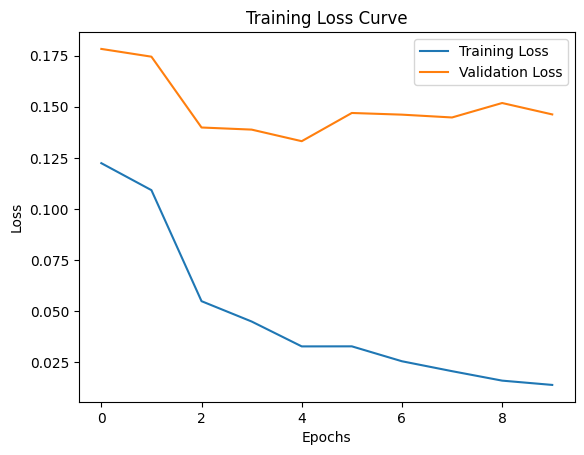

In [13]:
xavier = XavierInit(42, uniform=True)

X_train_Value = Value(X_train)
y_train_Value = Value(y_train)
X_test_Value = Value(X_test)
y_test_Value = Value(y_test)
h1 = Layer(100, activation="relu", init_method=xavier, input_shape=784)
h2 = Layer(100, activation="relu", init_method=xavier)
out = Layer(10, activation="softmax", init_method=xavier)

ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
ourmodel.compile(loss_function="CCE")
ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)
ourmodel.evaluate_model(X_test_Value,y_test_Value)
ourmodel.plot_loss()

### 3 Hiddlen layers with 100 neurons each

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 97983.69sample/s], Train Loss=0.0141, Val Loss=0.1633 


------------------------------------------------------------
Training finished!
Final Train Loss: 0.014110122807323933
Final Val Loss: 0.16327710449695587
Model Accuracy: 0.9706


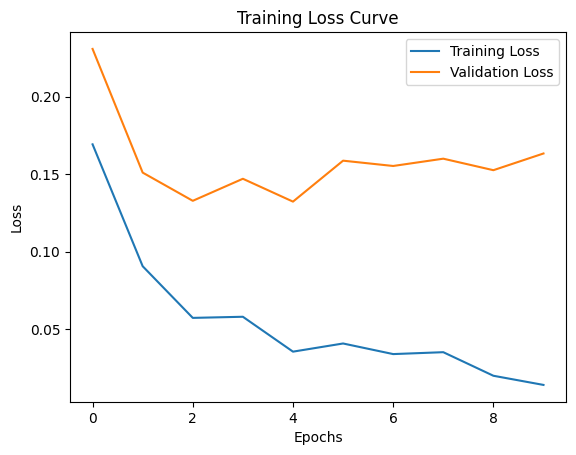

In [14]:
xavier = XavierInit(42, uniform=True)

X_train_Value = Value(X_train)
y_train_Value = Value(y_train)
X_test_Value = Value(X_test)
y_test_Value = Value(y_test)
h1 = Layer(100, activation="relu", init_method=xavier, input_shape=784)
h2 = Layer(100, activation="relu", init_method=xavier)
h3 = Layer(100, activation="relu", init_method=xavier)
out = Layer(10, activation="softmax", init_method=xavier)

ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2,h3, out], random_seed=42, verbose=1, batch_size=200)
ourmodel.compile(loss_function="CCE")
ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)
ourmodel.evaluate_model(X_test_Value,y_test_Value)
ourmodel.plot_loss()

### 4 Hidden layers with 100 neurons each


Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 68620.64sample/s], Train Loss=0.0220, Val Loss=0.1456


------------------------------------------------------------
Training finished!
Final Train Loss: 0.02196621522307396
Final Val Loss: 0.1456264704465866
Model Accuracy: 0.9701


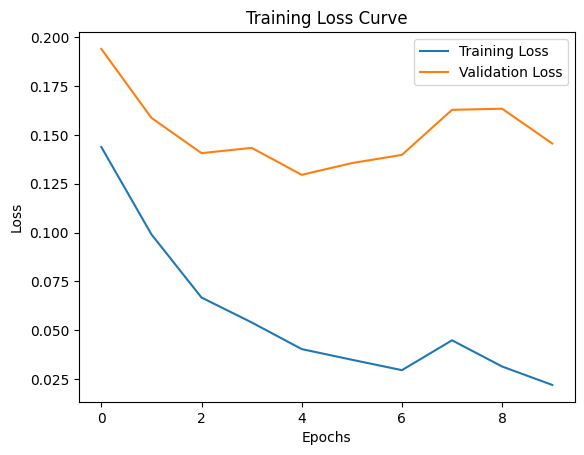

In [16]:
xavier = XavierInit(42, uniform=True)

X_train_Value = Value(X_train)
y_train_Value = Value(y_train)
X_test_Value = Value(X_test)
y_test_Value = Value(y_test)
h1 = Layer(100, activation="relu", init_method=xavier, input_shape=784)
h2 = Layer(100, activation="relu", init_method=xavier)
h3 = Layer(100, activation="relu", init_method=xavier)
h4 = Layer(100, activation="relu", init_method=xavier)
out = Layer(10, activation="softmax", init_method=xavier)

ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2,h3, h4, out], random_seed=42, verbose=1, batch_size=200)
ourmodel.compile(loss_function="CCE")
ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)
ourmodel.evaluate_model(X_test_Value,y_test_Value)
ourmodel.plot_loss()

## Variation of Neurons in hidden layers
We will compare the performance of the model with different number of neurons in hidden layers. We will use 2 hidden layers with 50 neurons each, 2 hidden layers with 100 neurons each and 2 hidden layers with 200 neurons each.

### 2 Hidden layers with 50 neurons each

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 134451.29sample/s], Train Loss=0.0358, Val Loss=0.1979


------------------------------------------------------------
Training finished!
Final Train Loss: 0.035808756947517395
Final Val Loss: 0.1978558450937271
Model Accuracy: 0.9639


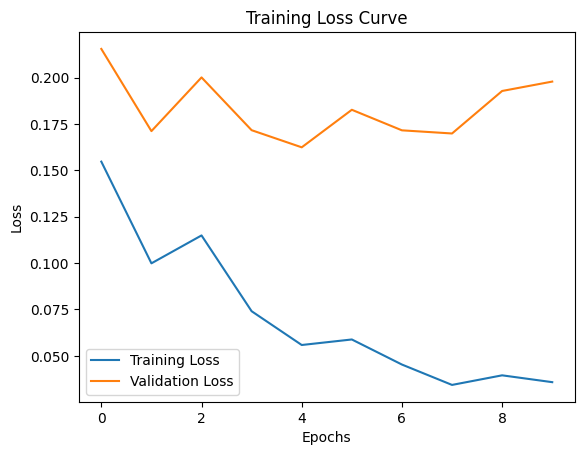

In [20]:
xavier = XavierInit(42, uniform=True)

X_train_Value = Value(X_train)
y_train_Value = Value(y_train)
X_test_Value = Value(X_test)
y_test_Value = Value(y_test)
h1 = Layer(50, activation="relu", init_method=xavier, input_shape=784)
h2 = Layer(50, activation="relu", init_method=xavier)
out = Layer(10, activation="softmax", init_method=xavier)

ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
ourmodel.compile(loss_function="CCE")
ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)
ourmodel.evaluate_model(X_test_Value,y_test_Value)
ourmodel.plot_loss()

### 2 Hidden layers with 100 neurons each

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 78324.33sample/s], Train Loss=0.0140, Val Loss=0.1462 


------------------------------------------------------------
Training finished!
Final Train Loss: 0.014042528346180916
Final Val Loss: 0.14621494710445404
Model Accuracy: 0.9729


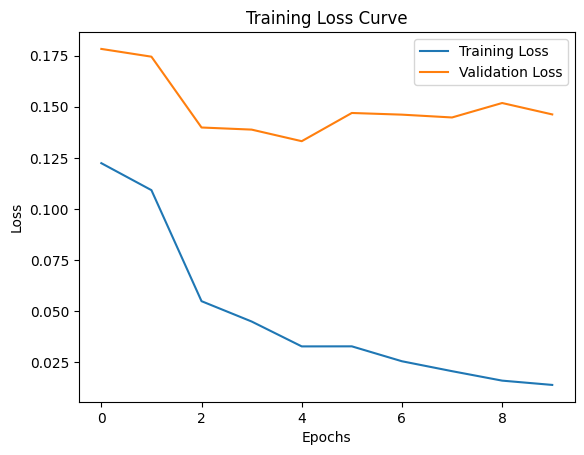

In [19]:
xavier = XavierInit(42, uniform=True)

X_train_Value = Value(X_train)
y_train_Value = Value(y_train)
X_test_Value = Value(X_test)
y_test_Value = Value(y_test)
h1 = Layer(100, activation="relu", init_method=xavier, input_shape=784)
h2 = Layer(100, activation="relu", init_method=xavier)
out = Layer(10, activation="softmax", init_method=xavier)

ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
ourmodel.compile(loss_function="CCE")
ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)
ourmodel.evaluate_model(X_test_Value,y_test_Value)
ourmodel.plot_loss()

### 2 Hidden layers with 200 neurons each

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 59893.02sample/s], Train Loss=0.0106, Val Loss=0.1437

------------------------------------------------------------
Training finished!
Final Train Loss: 0.010641220957040787
Final Val Loss: 0.1437055617570877
Model Accuracy: 0.9754


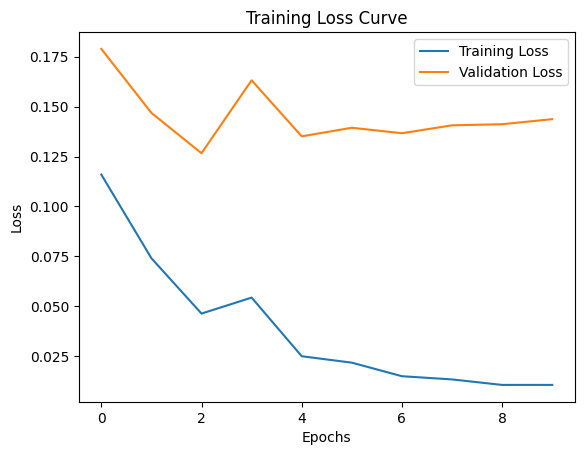

In [21]:
xavier = XavierInit(42, uniform=True)

X_train_Value = Value(X_train)
y_train_Value = Value(y_train)
X_test_Value = Value(X_test)
y_test_Value = Value(y_test)
h1 = Layer(200, activation="relu", init_method=xavier, input_shape=784)
h2 = Layer(200, activation="relu", init_method=xavier)
out = Layer(10, activation="softmax", init_method=xavier)

ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
ourmodel.compile(loss_function="CCE")
ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)
ourmodel.evaluate_model(X_test_Value,y_test_Value)
ourmodel.plot_loss()

### Variation of Activation functions
We will compare the performance of the model with different activation functions. Here are the activation functions we will compare:
1. Sigmoid
2. Tanh
3. ReLU
4. Leaky ReLU
5. ELU
6. Linear

for the output layer we will use softmax activation function.

In [6]:
def test_activation_and_show_result(activation):
    xavier = XavierInit(42, uniform=True)

    X_train_Value = Value(X_train)
    y_train_Value = Value(y_train)
    X_test_Value = Value(X_test)
    y_test_Value = Value(y_test)
    h1 = Layer(100, activation=activation, init_method=xavier, input_shape=784)
    h2 = Layer(100, activation=activation, init_method=xavier)
    out = Layer(10, activation="softmax", init_method=xavier)

    ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
    ourmodel.compile(loss_function="CCE")
    ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)

    ourmodel.evaluate_model(X_test_Value, y_test_Value)
    ourmodel.plot_loss()
    ourmodel.plot_weight_distribution([0,1,2])
    ourmodel.plot_weight_gradient_distribution([0,1,2])





### Sigmoid activation function

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 108386.95sample/s], Train Loss=0.0704, Val Loss=0.1389


------------------------------------------------------------
Training finished!
Final Train Loss: 0.07036050409078598
Final Val Loss: 0.13887813687324524
Model Accuracy: 0.9616


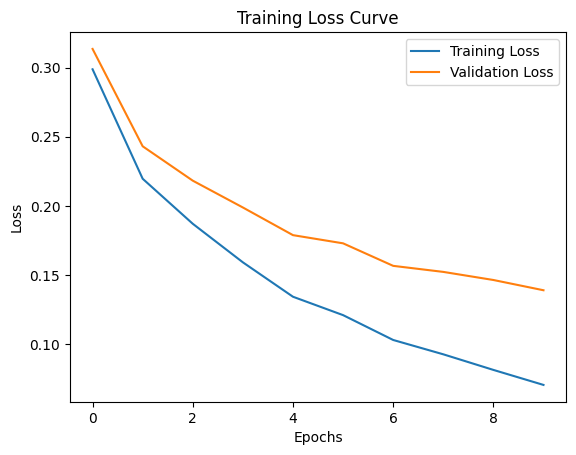

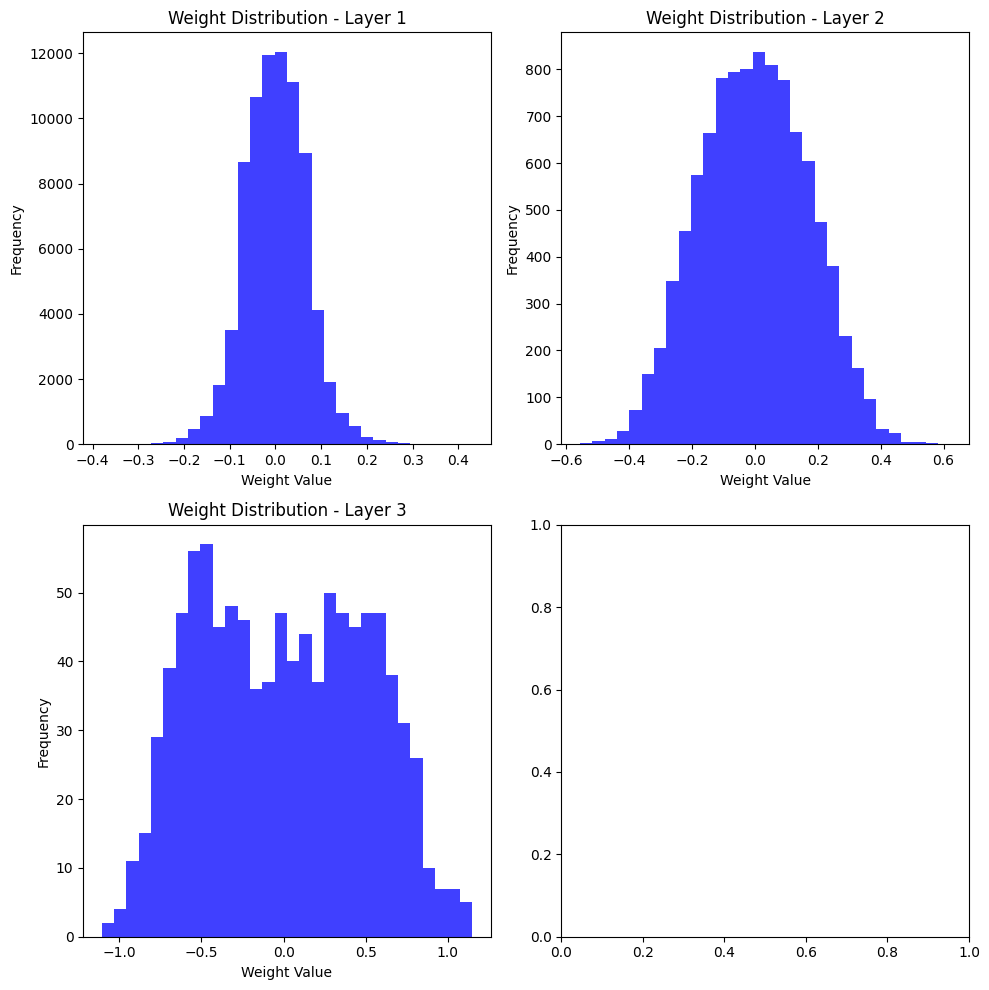

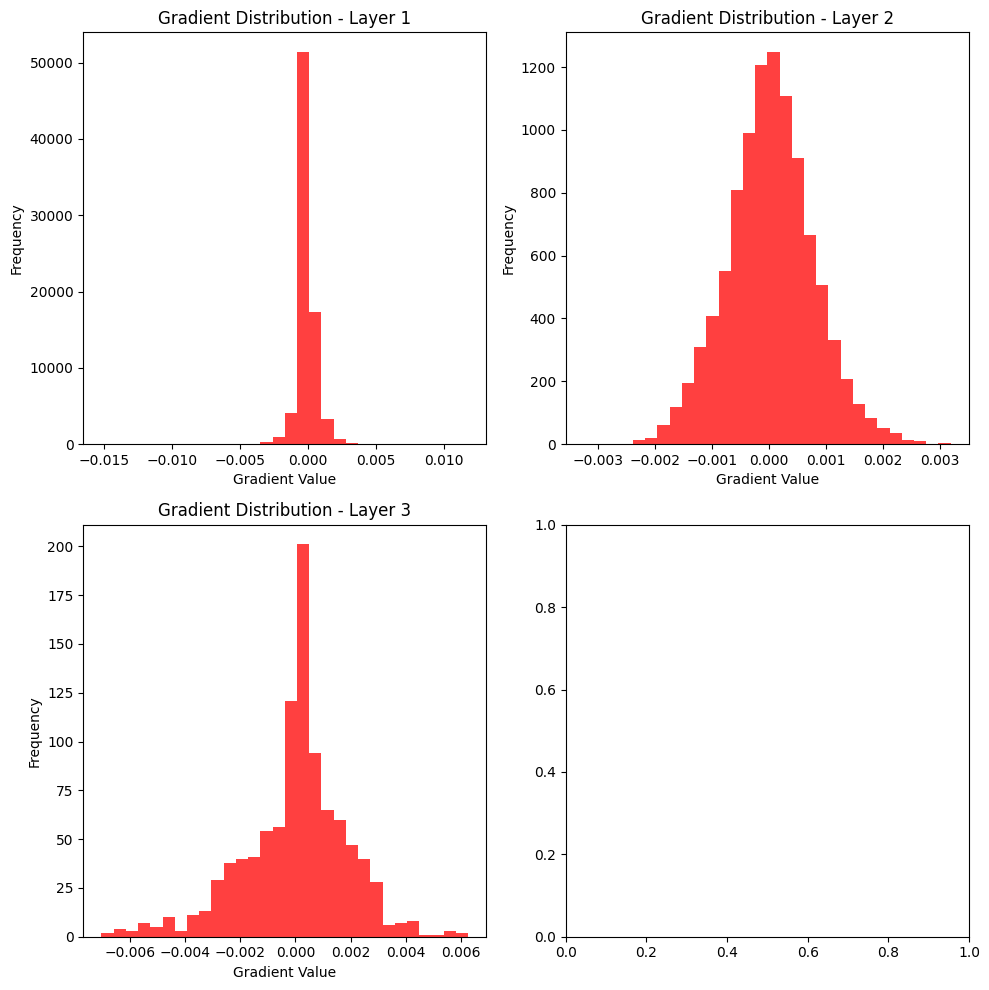

In [7]:
test_activation_and_show_result("sigmoid")

### Tanh activation function

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 130627.56sample/s], Train Loss=0.0047, Val Loss=0.1436


------------------------------------------------------------
Training finished!
Final Train Loss: 0.004686265718191862
Final Val Loss: 0.143625870347023
Model Accuracy: 0.9657


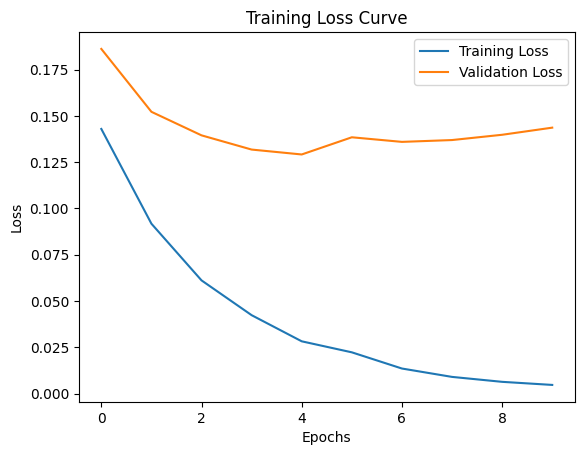

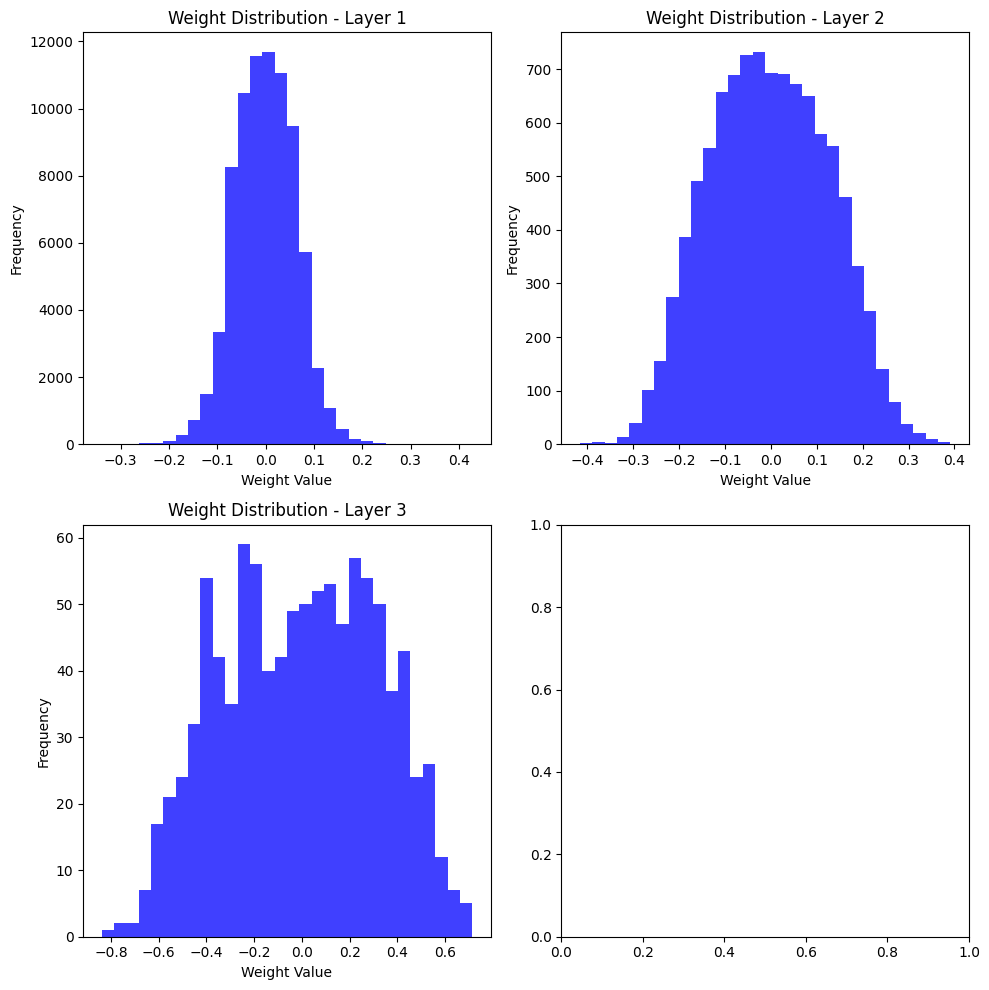

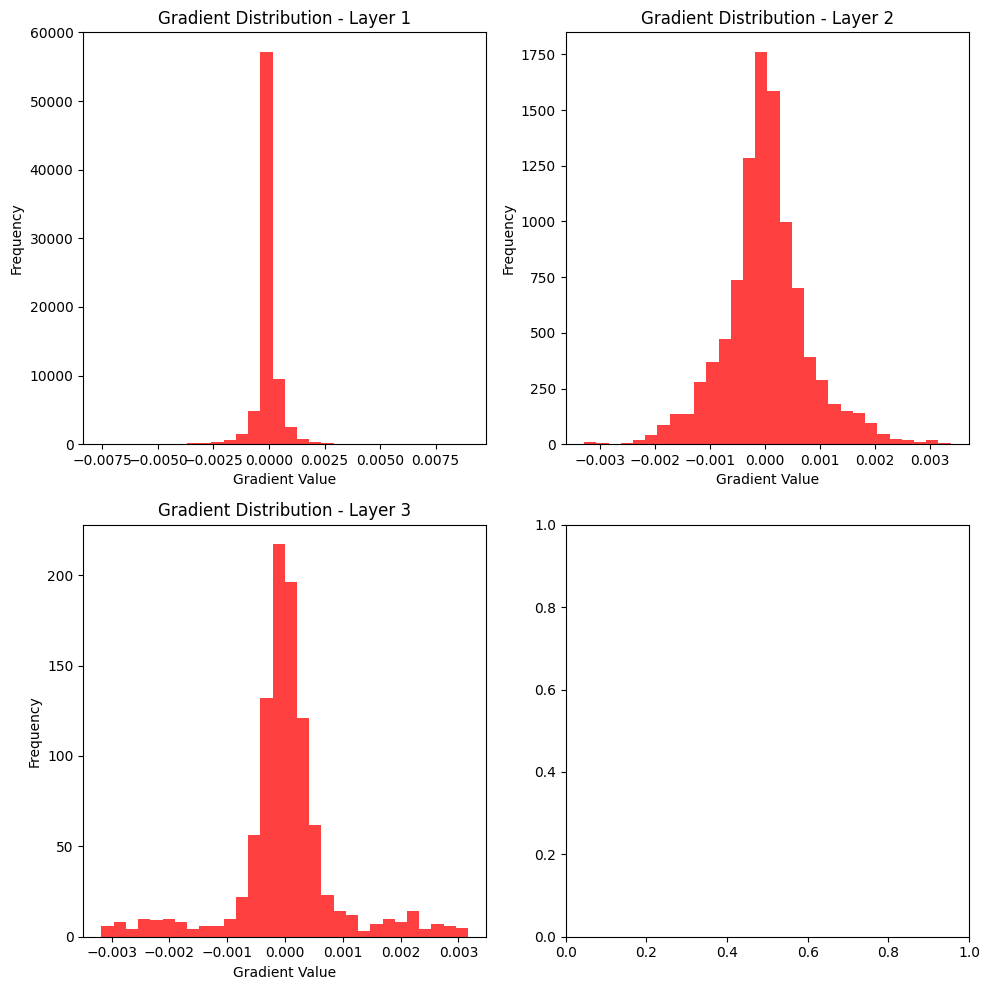

In [10]:
test_activation_and_show_result("tanh")

### ReLU activation function

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 120213.17sample/s], Train Loss=0.0140, Val Loss=0.1462


------------------------------------------------------------
Training finished!
Final Train Loss: 0.014042528346180916
Final Val Loss: 0.14621494710445404
Model Accuracy: 0.9729


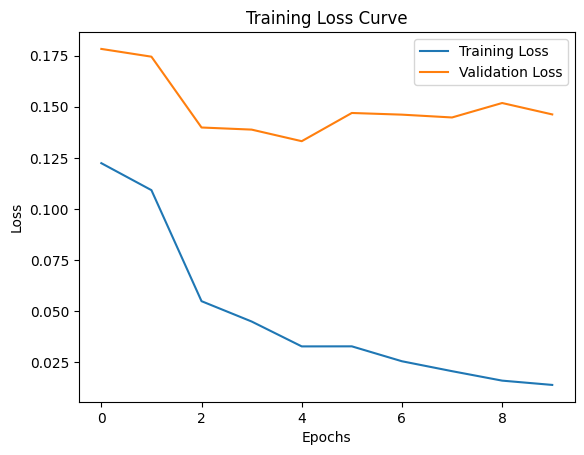

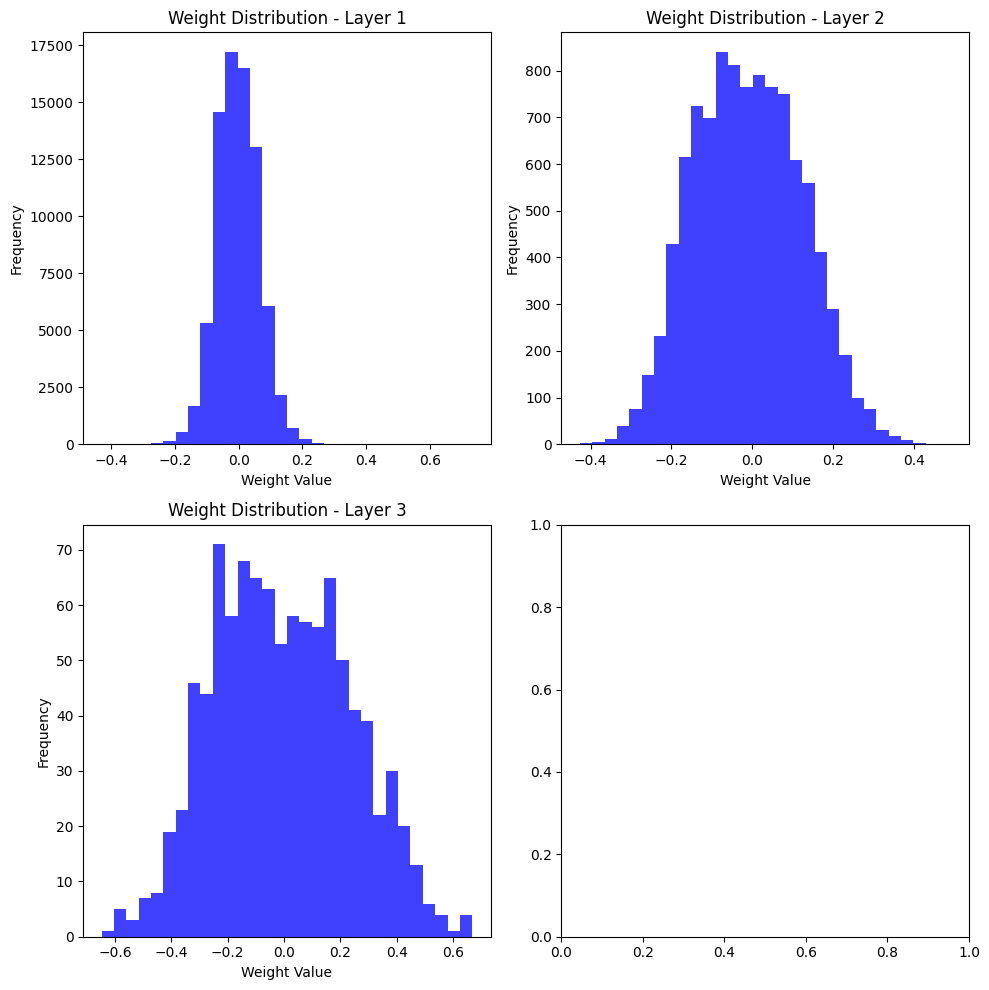

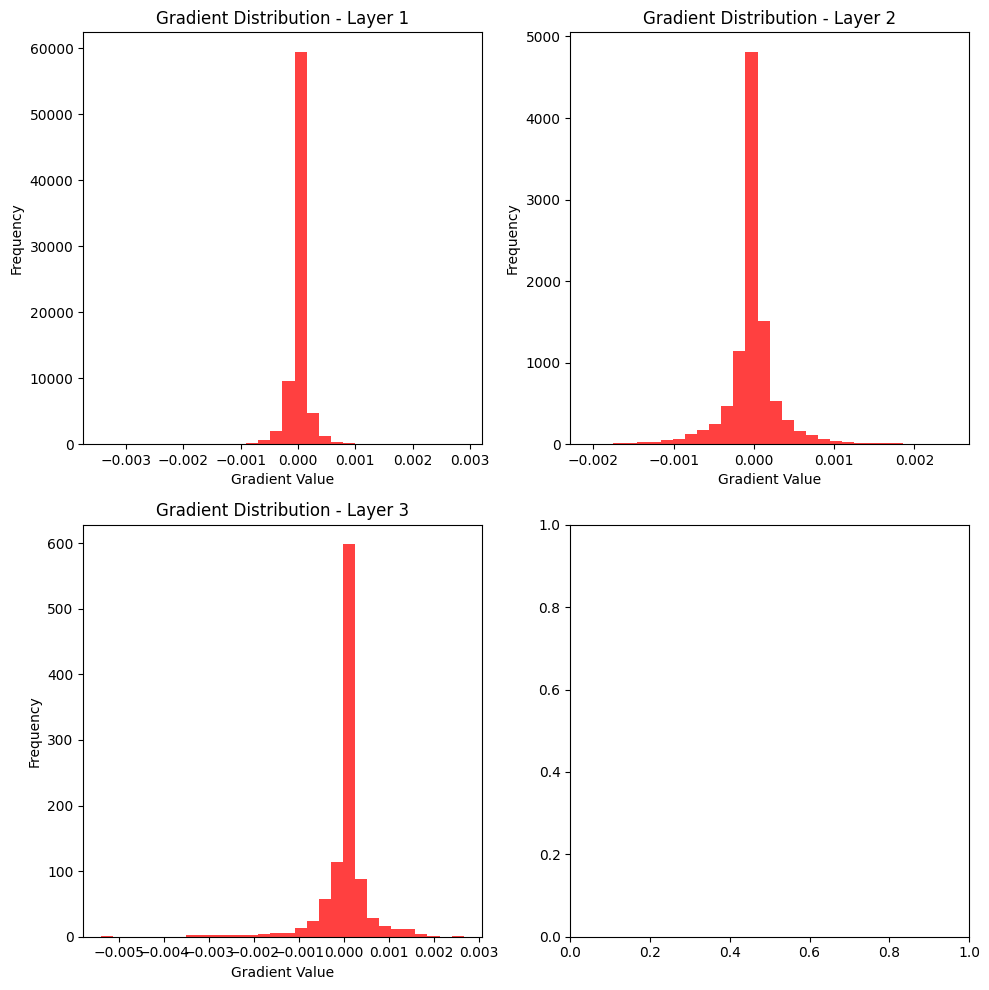

In [9]:
test_activation_and_show_result("relu")

### Leaky ReLU activation function

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 86088.72sample/s], Train Loss=0.0183, Val Loss=0.1568 


------------------------------------------------------------
Training finished!
Final Train Loss: 0.018286006525158882
Final Val Loss: 0.15683779120445251
Model Accuracy: 0.9718


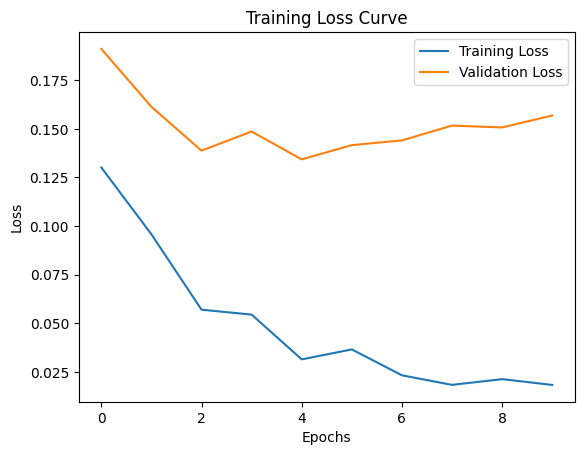

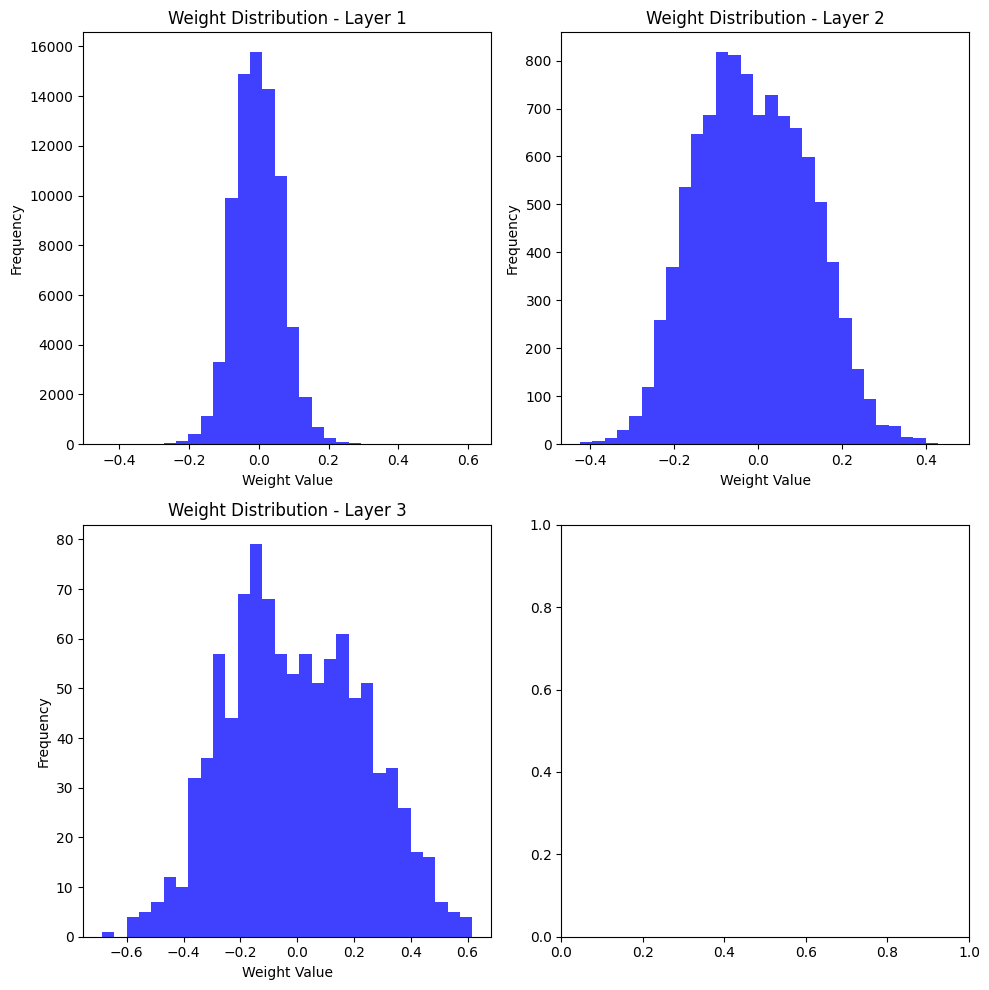

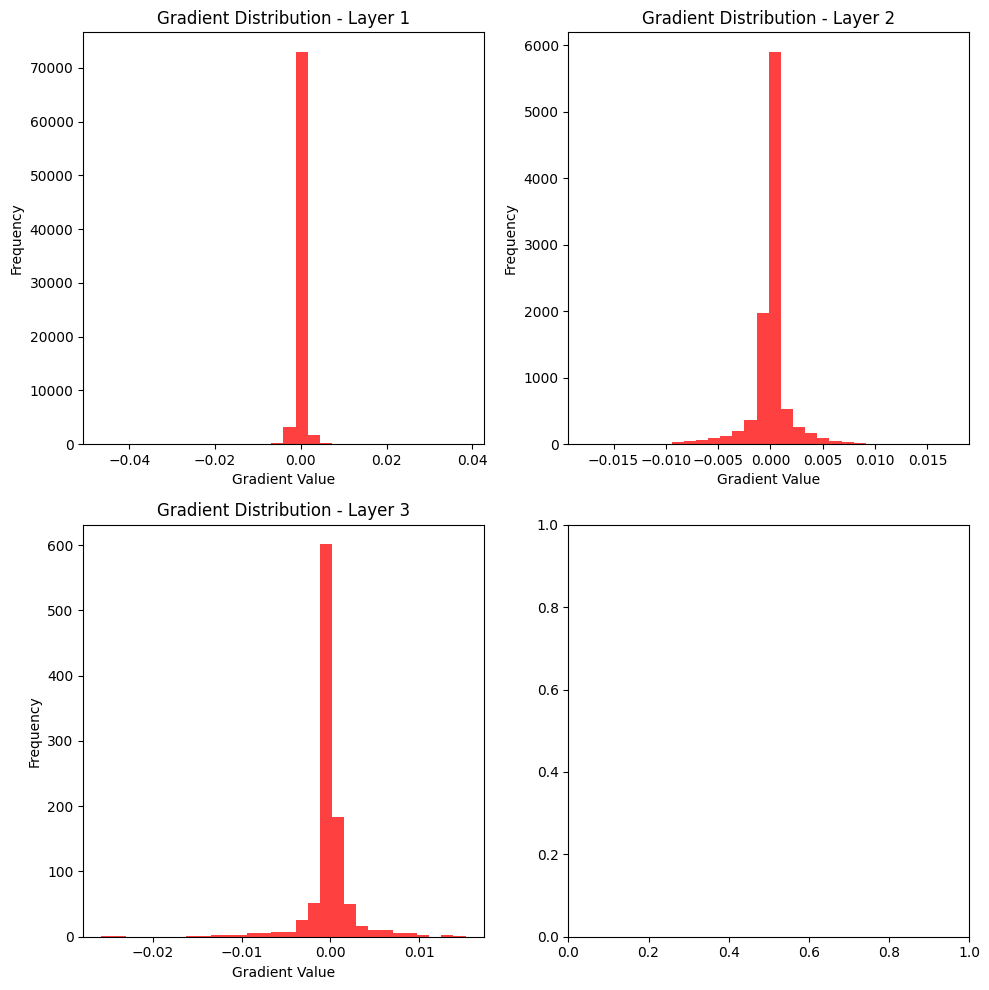

In [12]:
test_activation_and_show_result("leaky_relu")

### ELU activation function

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 87028.56sample/s], Train Loss=0.0097, Val Loss=0.1390 

------------------------------------------------------------
Training finished!
Final Train Loss: 0.00966335367411375
Final Val Loss: 0.1389564573764801
Model Accuracy: 0.9727


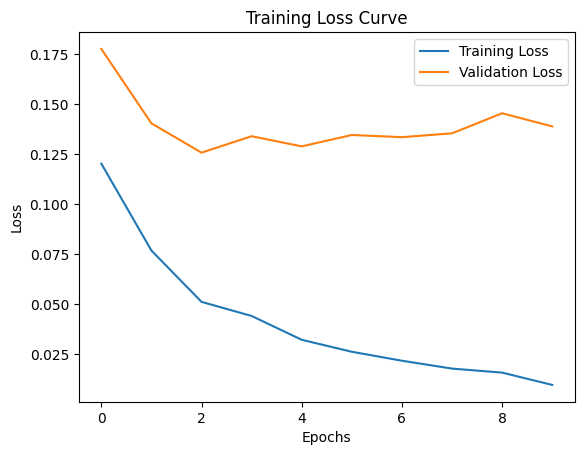

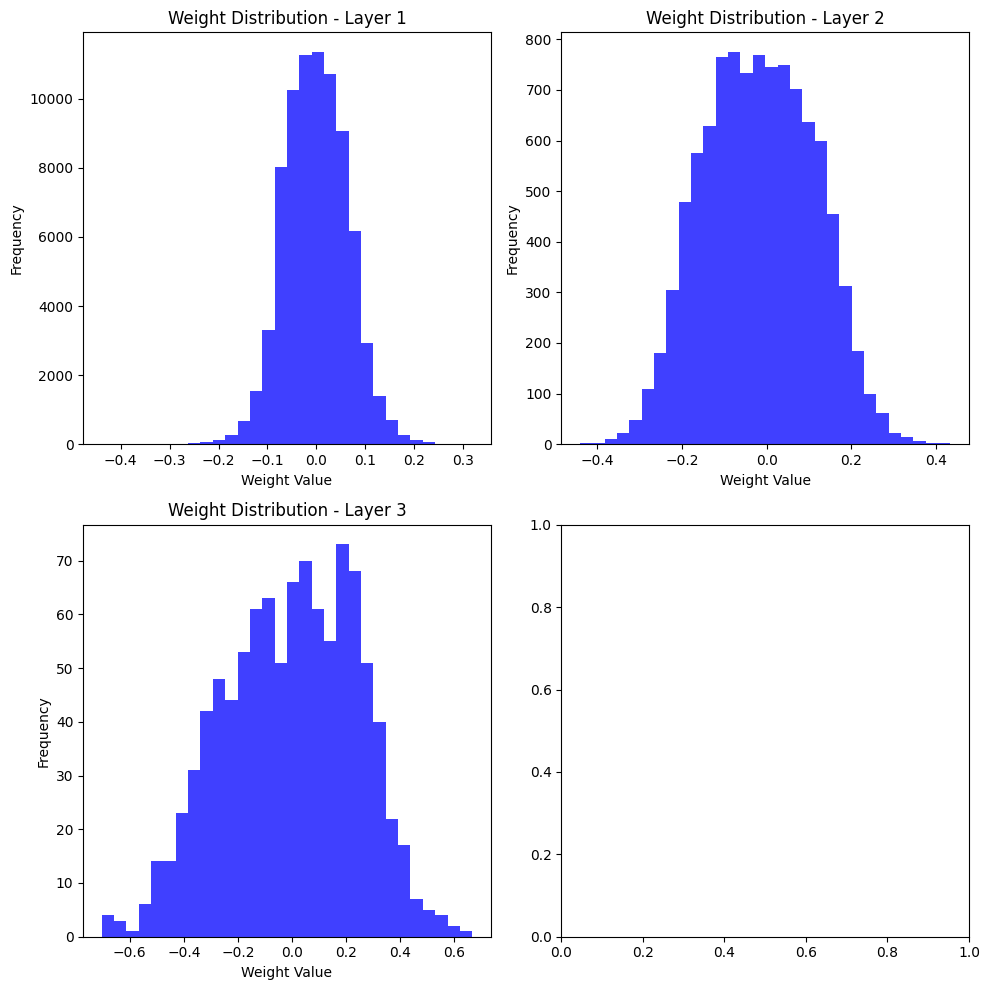

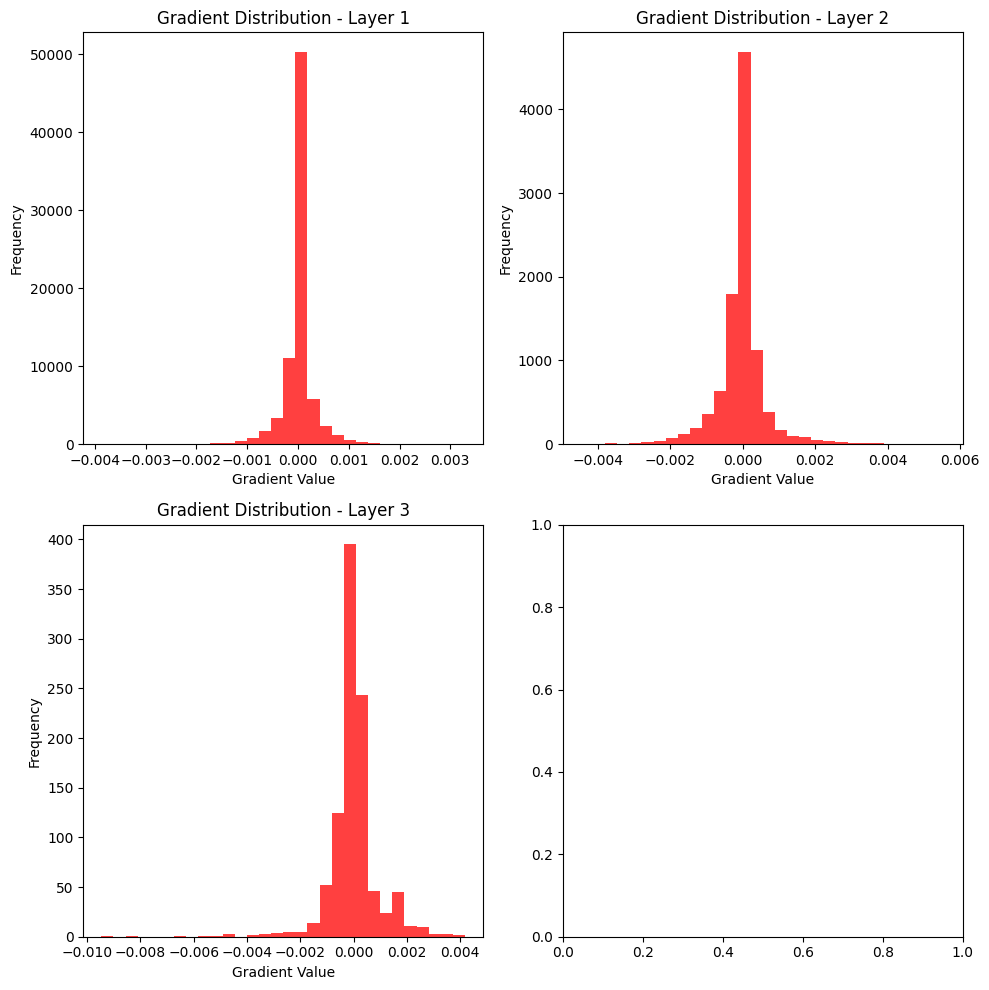

In [11]:
test_activation_and_show_result("elu")

### Linear activation function

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 138853.29sample/s], Train Loss=0.3363, Val Loss=0.4178


------------------------------------------------------------
Training finished!
Final Train Loss: 0.3363032341003418
Final Val Loss: 0.4178107678890228
Model Accuracy: 0.8955


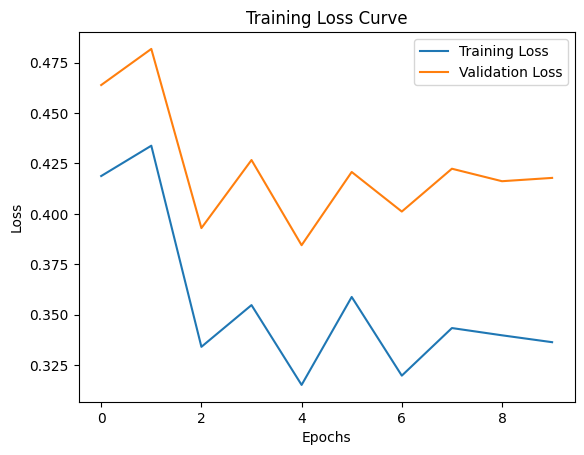

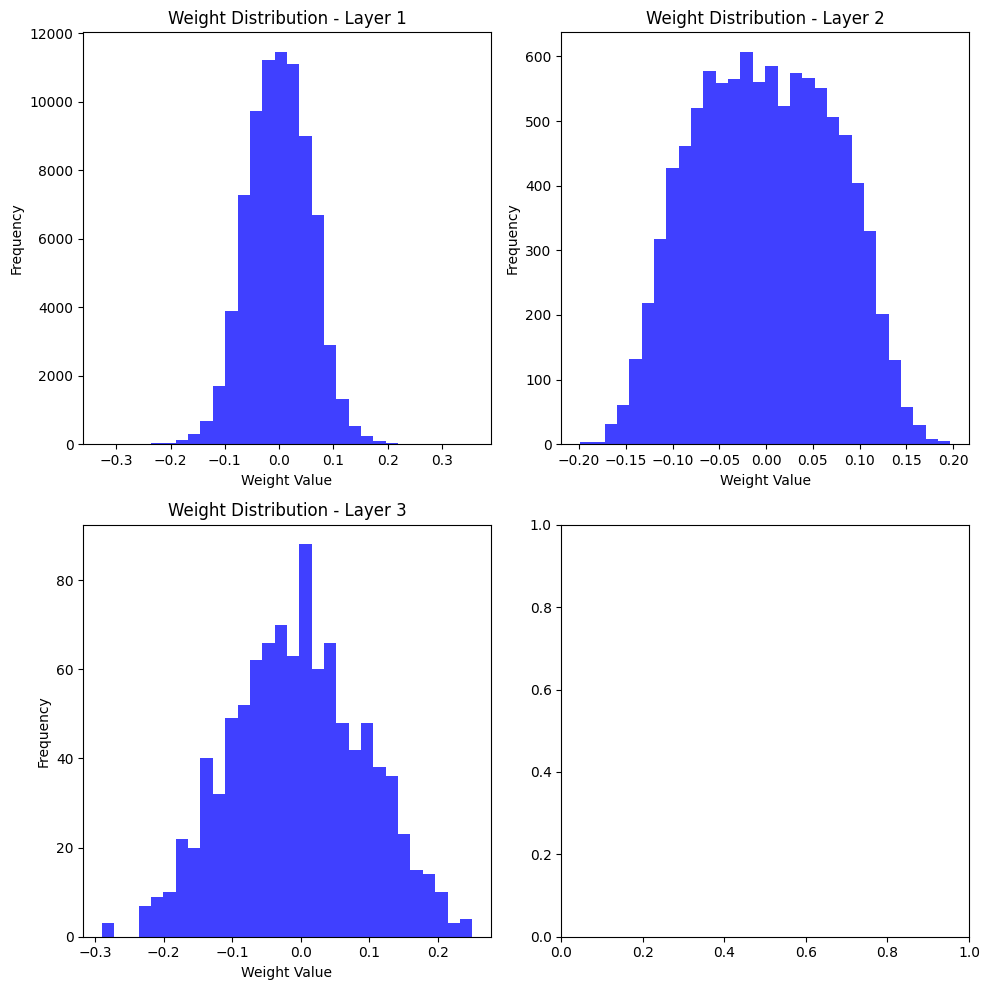

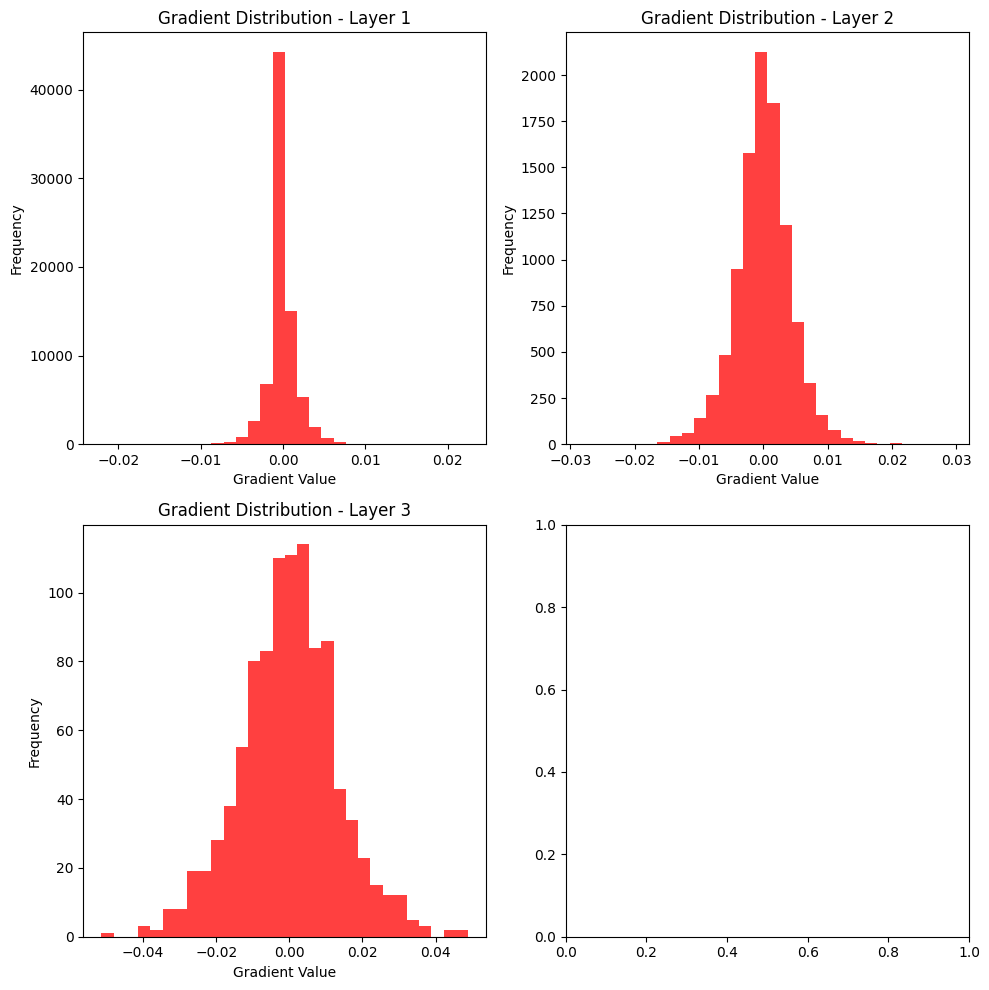

In [8]:
test_activation_and_show_result("linear")

### Variation of Learning rate
We will compare the performance of the model with different learning rates. Here are the learning rates we will compare:
1. 0.01
2. 0.05
3. 0.5

We will use 2 hidden layers with 100 neurons each and ReLU activation function for this comparison. The output will be softmax activation function.

In [22]:
def test_learning_rate(learning_rate:float):
    xavier = XavierInit(42, uniform=True)

    X_train_Value = Value(X_train)
    y_train_Value = Value(y_train)
    X_test_Value = Value(X_test)
    y_test_Value = Value(y_test)
    h1 = Layer(100, activation="relu", init_method=xavier, input_shape=784)
    h2 = Layer(100, activation="relu", init_method=xavier)
    out = Layer(10, activation="softmax", init_method=xavier)

    ourmodel = FFNN(learning_rate=learning_rate, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
    ourmodel.compile(loss_function="CCE")
    ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)

    ourmodel.evaluate_model(X_test_Value, y_test_Value)
    ourmodel.plot_loss()
    ourmodel.plot_weight_distribution([0,1,2])
    ourmodel.plot_weight_gradient_distribution([0,1,2])

### Learning rate = 0.01

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 60545.77sample/s], Train Loss=0.1749, Val Loss=0.2181 

------------------------------------------------------------
Training finished!
Final Train Loss: 0.1748654842376709
Final Val Loss: 0.21807245910167694
Model Accuracy: 0.9368


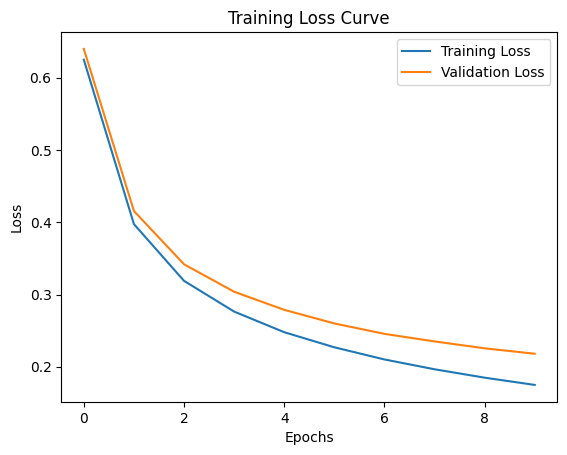

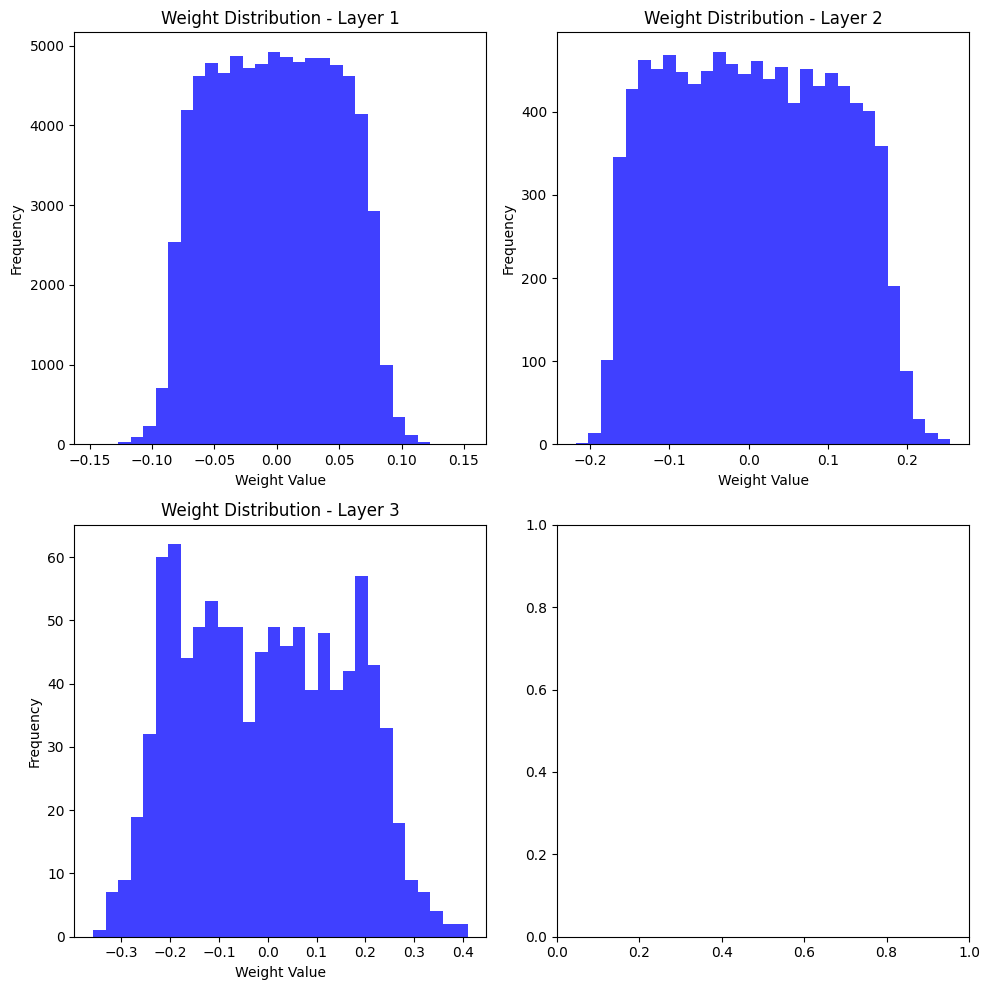

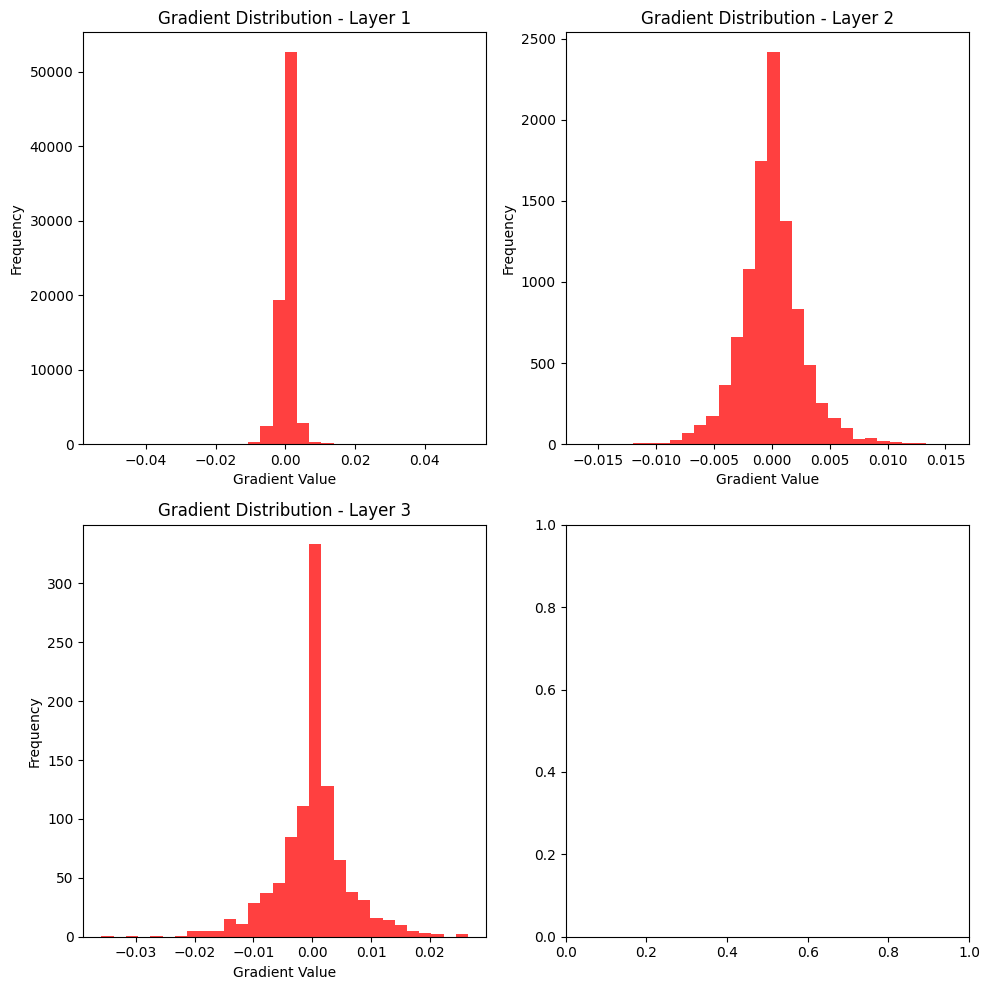

In [23]:
test_learning_rate(0.01)

### Learning rate = 0.05

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 104884.38sample/s], Train Loss=0.0629, Val Loss=0.1412

------------------------------------------------------------
Training finished!
Final Train Loss: 0.0629485547542572
Final Val Loss: 0.1412072628736496
Model Accuracy: 0.9630


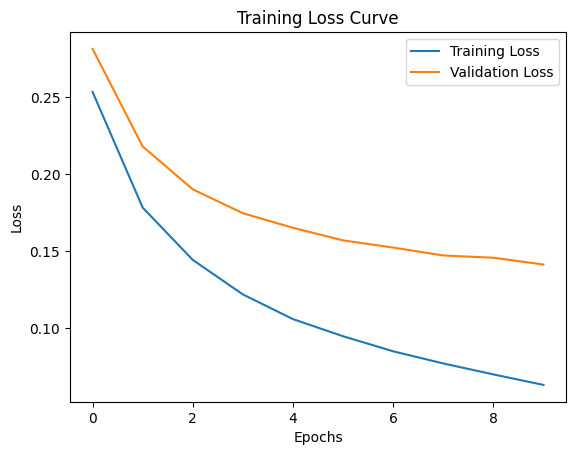

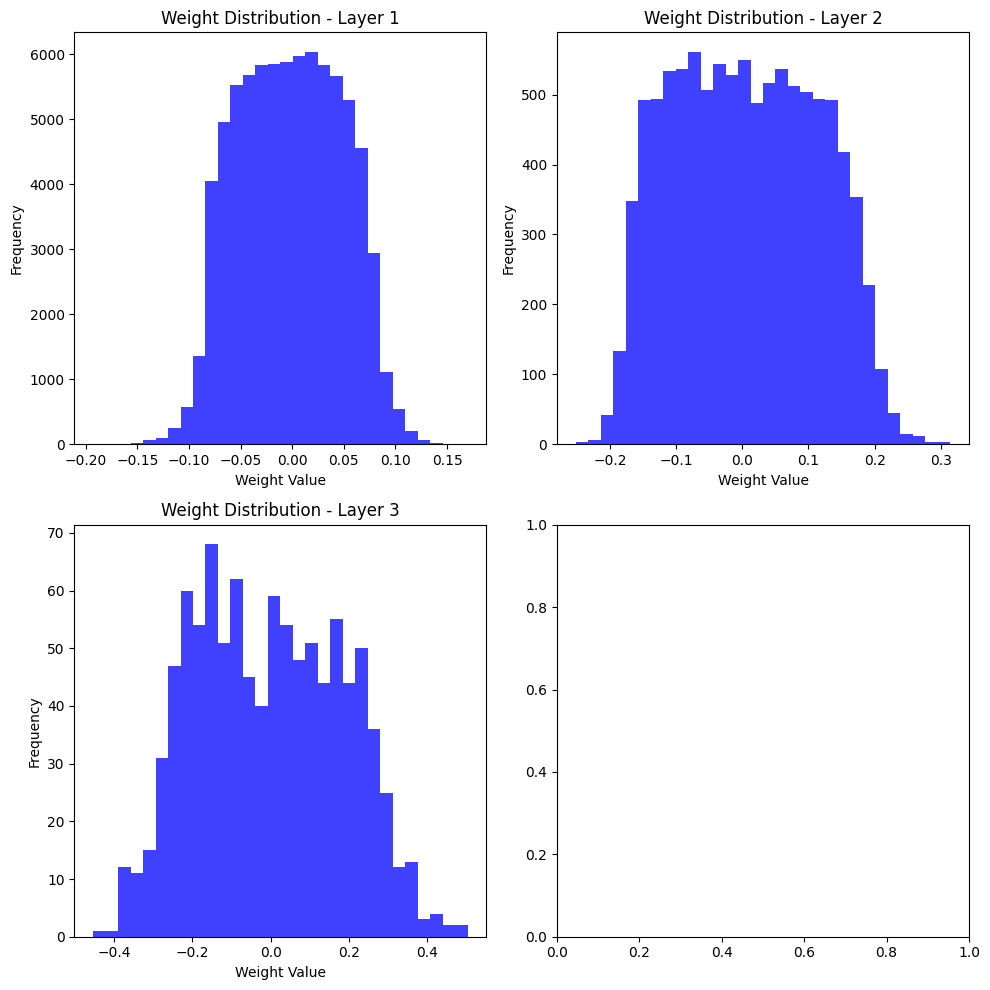

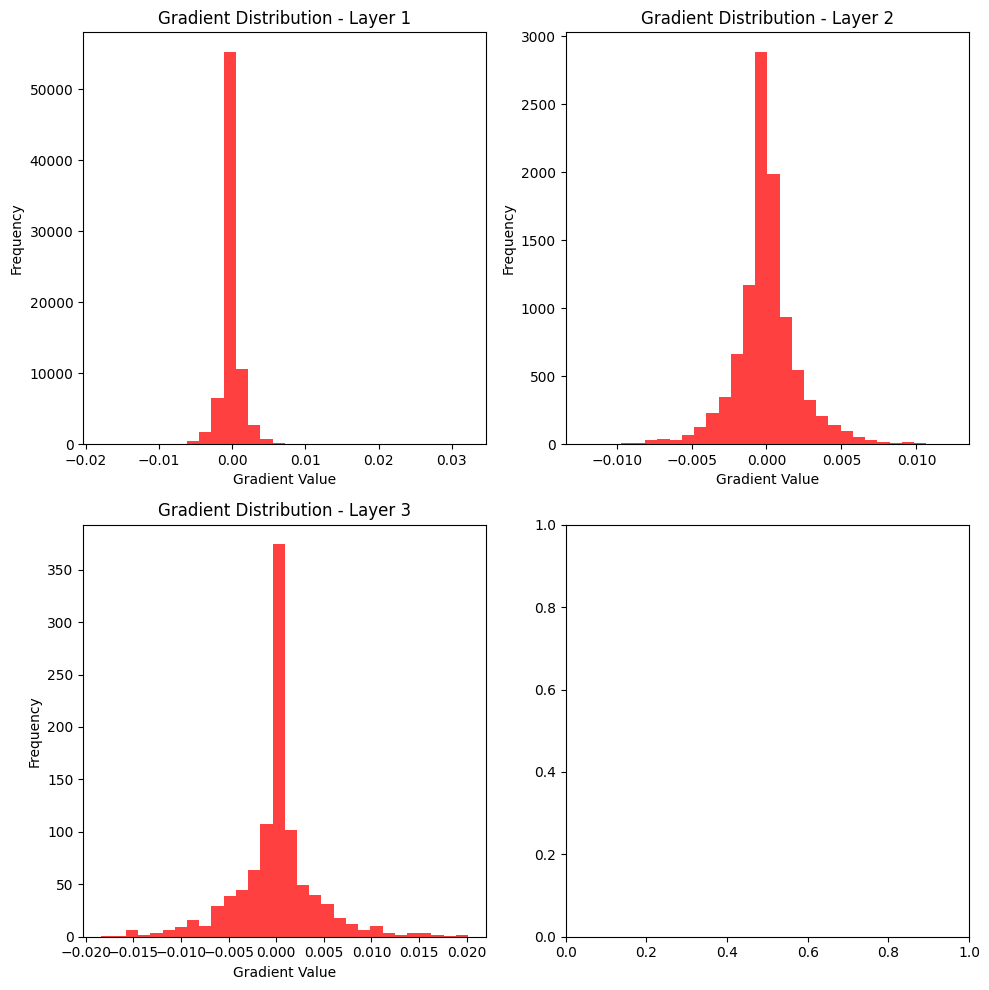

In [24]:
test_learning_rate(0.05)

### Learning rate = 0.5

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 104468.87sample/s], Train Loss=0.0140, Val Loss=0.1462


------------------------------------------------------------
Training finished!
Final Train Loss: 0.014042528346180916
Final Val Loss: 0.14621494710445404
Model Accuracy: 0.9729


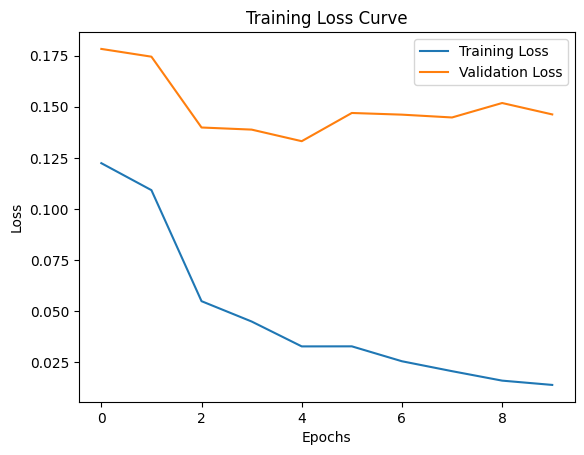

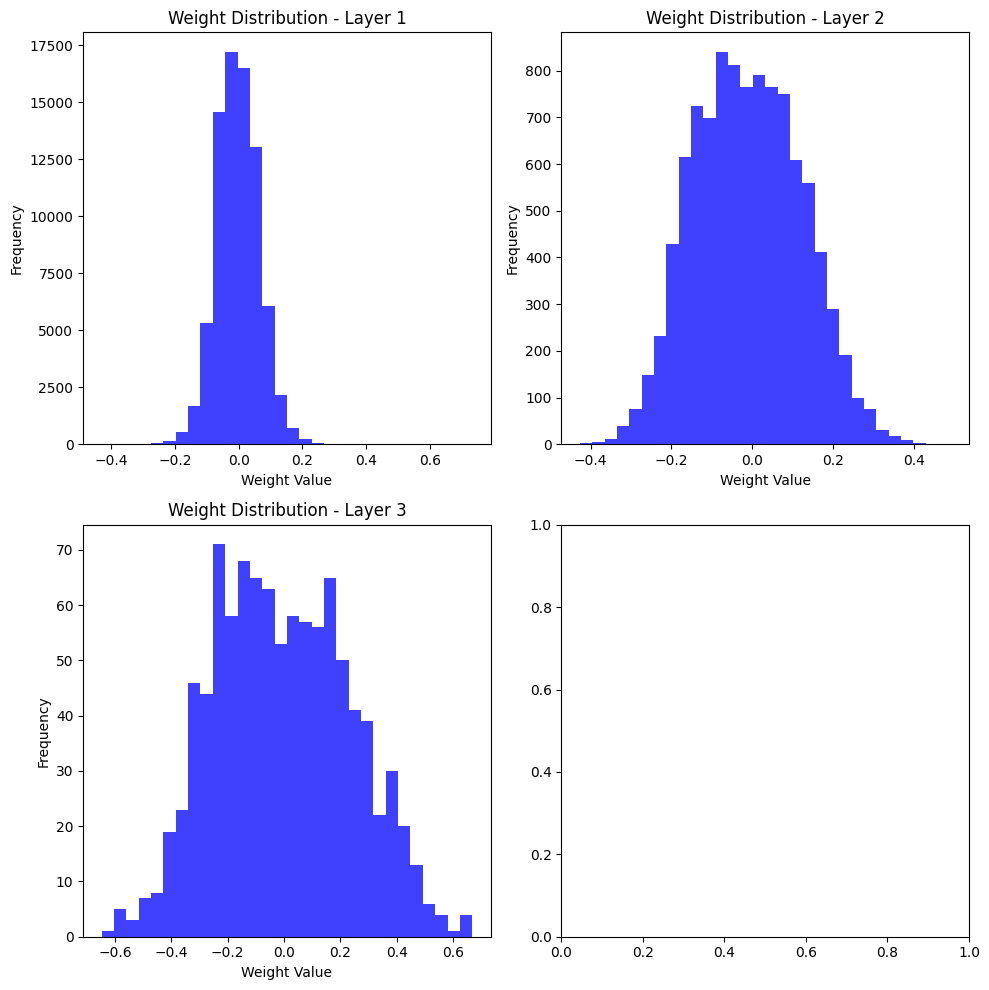

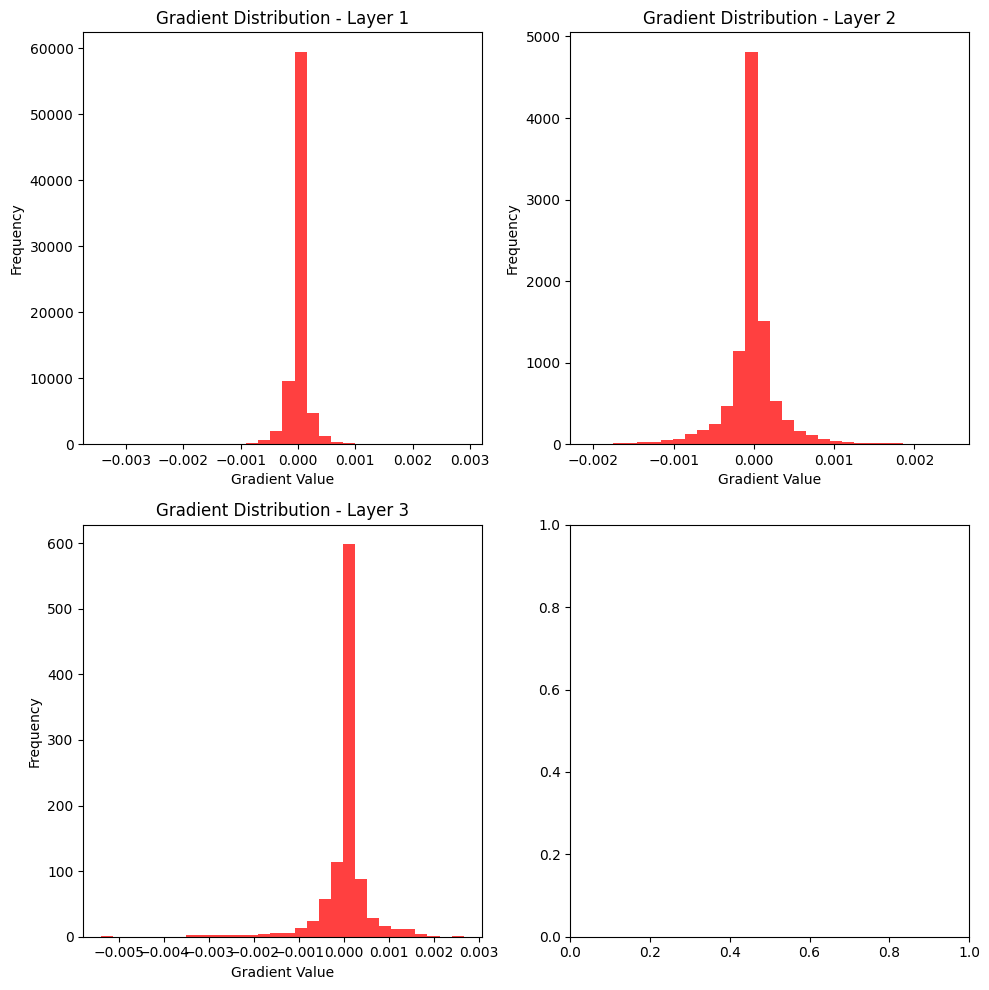

In [25]:
test_learning_rate(0.5)

### Weight Initialization
We will compare the performance of the model with different weight initialization techniques. Here are the weight initialization techniques we will compare:
1. Random Uniform initialization
2. Xavier initialization
3. He initialization
4. Zero initialization
5. Random Normal initialization

In [29]:
def test_initializtion(initMethod):
    #xavier = XavierInit(42, uniform=True)

    X_train_Value = Value(X_train)
    y_train_Value = Value(y_train)
    X_test_Value = Value(X_test)
    y_test_Value = Value(y_test)
    h1 = Layer(100, activation="relu", init_method=initMethod, input_shape=784)
    h2 = Layer(100, activation="relu", init_method=initMethod)
    out = Layer(10, activation="softmax", init_method=initMethod)

    ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
    ourmodel.compile(loss_function="CCE")
    ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)

    ourmodel.evaluate_model(X_test_Value, y_test_Value)
    ourmodel.plot_loss()
    ourmodel.plot_weight_distribution([0,1,2])
    ourmodel.plot_weight_gradient_distribution([0,1,2])

In [27]:
zero = ZeroInit(42)
xavier = XavierInit(42,True)
he = HeInit(42)
randUniform = RandomUniform(42,-0.1,0.1)
randNormal = RandomNormal(42,0,1)

### Random Uniform initialization

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 118356.35sample/s], Train Loss=0.0124, Val Loss=0.1456


------------------------------------------------------------
Training finished!
Final Train Loss: 0.012370266951620579
Final Val Loss: 0.14563579857349396
Model Accuracy: 0.9729


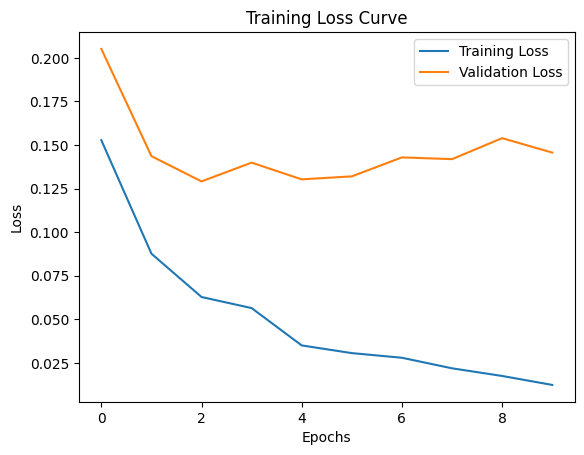

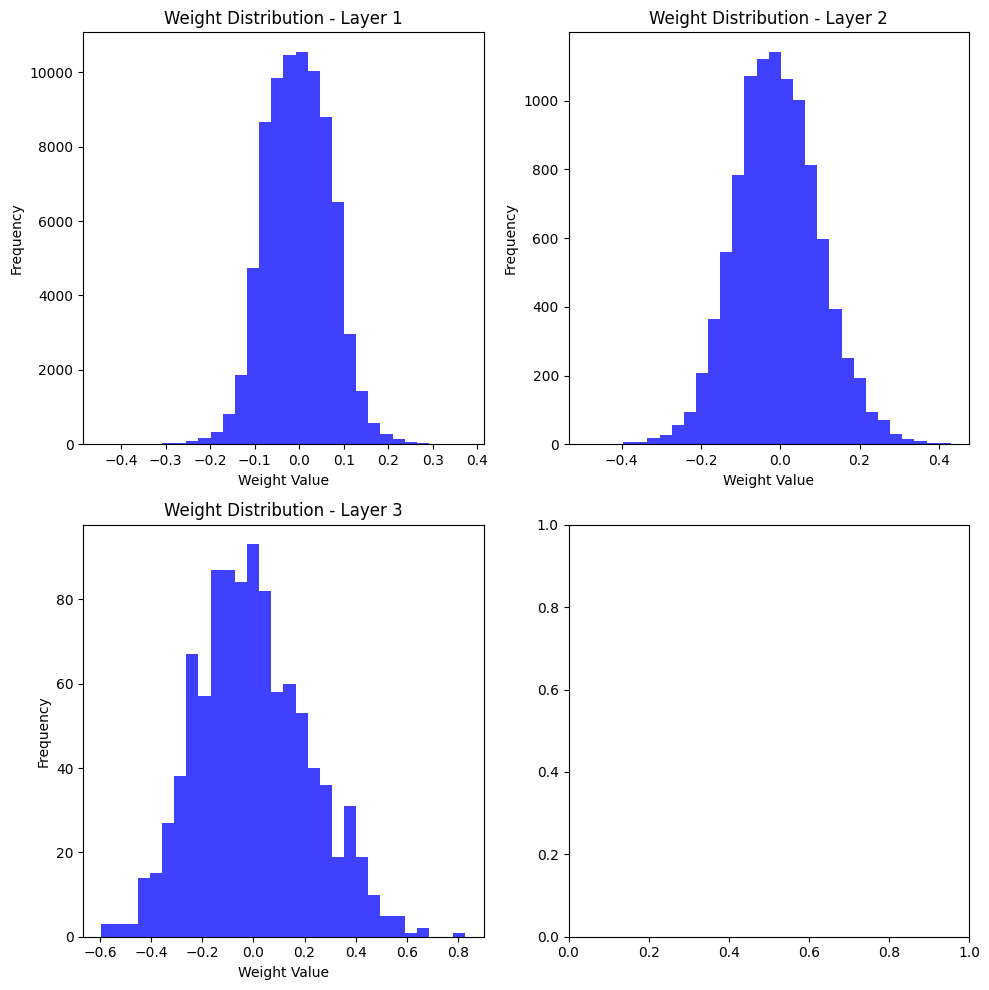

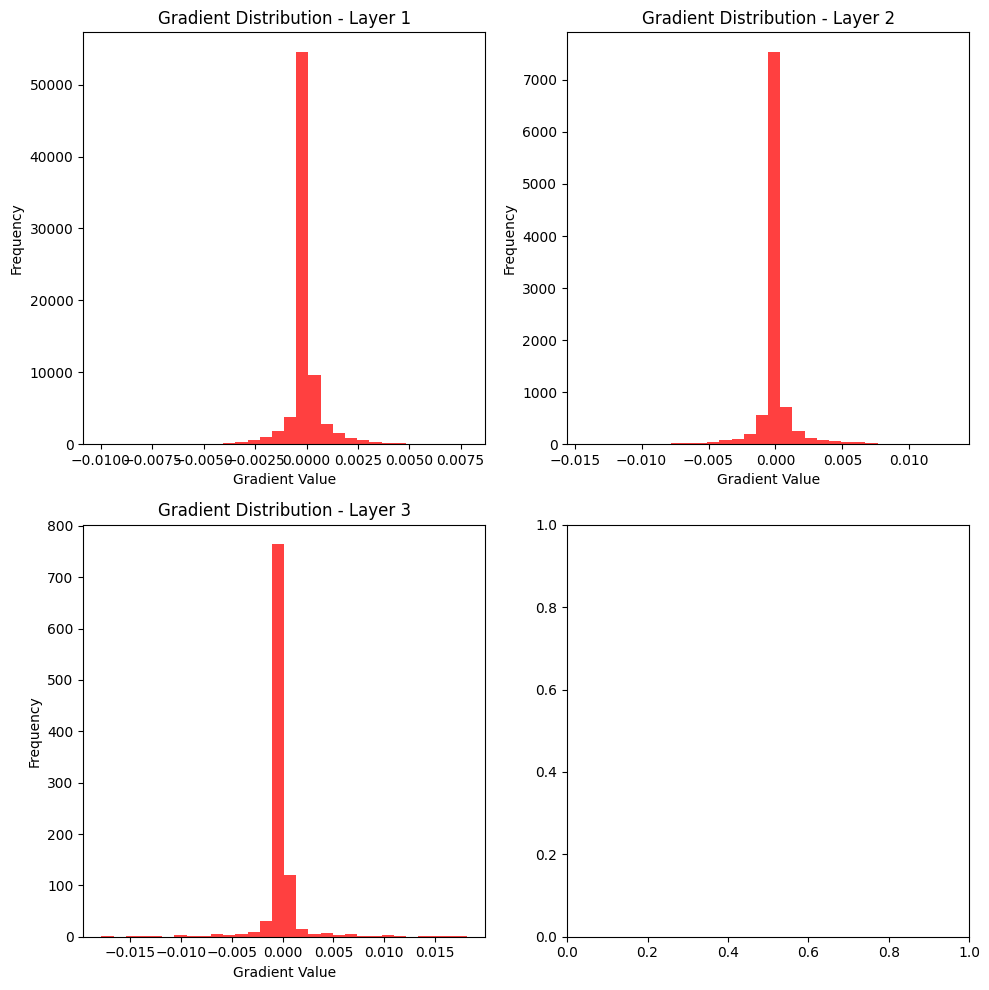

Epoch 3/10:	 51%|█████████████████████████████████████████▏                                      | 28800/56000 [00:15, 166664.24sample/s], Train Loss=N/A, Val Loss=N/A

In [37]:
test_initializtion(randUniform)

### Xavier initialization

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 105684.39sample/s], Train Loss=0.0140, Val Loss=0.1462

------------------------------------------------------------
Training finished!
Final Train Loss: 0.014042528346180916
Final Val Loss: 0.14621494710445404
Model Accuracy: 0.9729


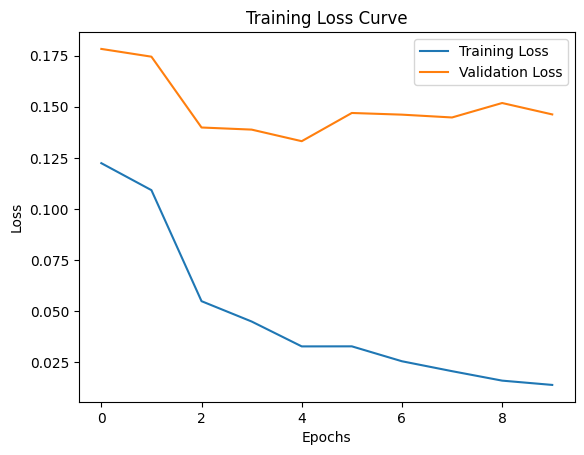

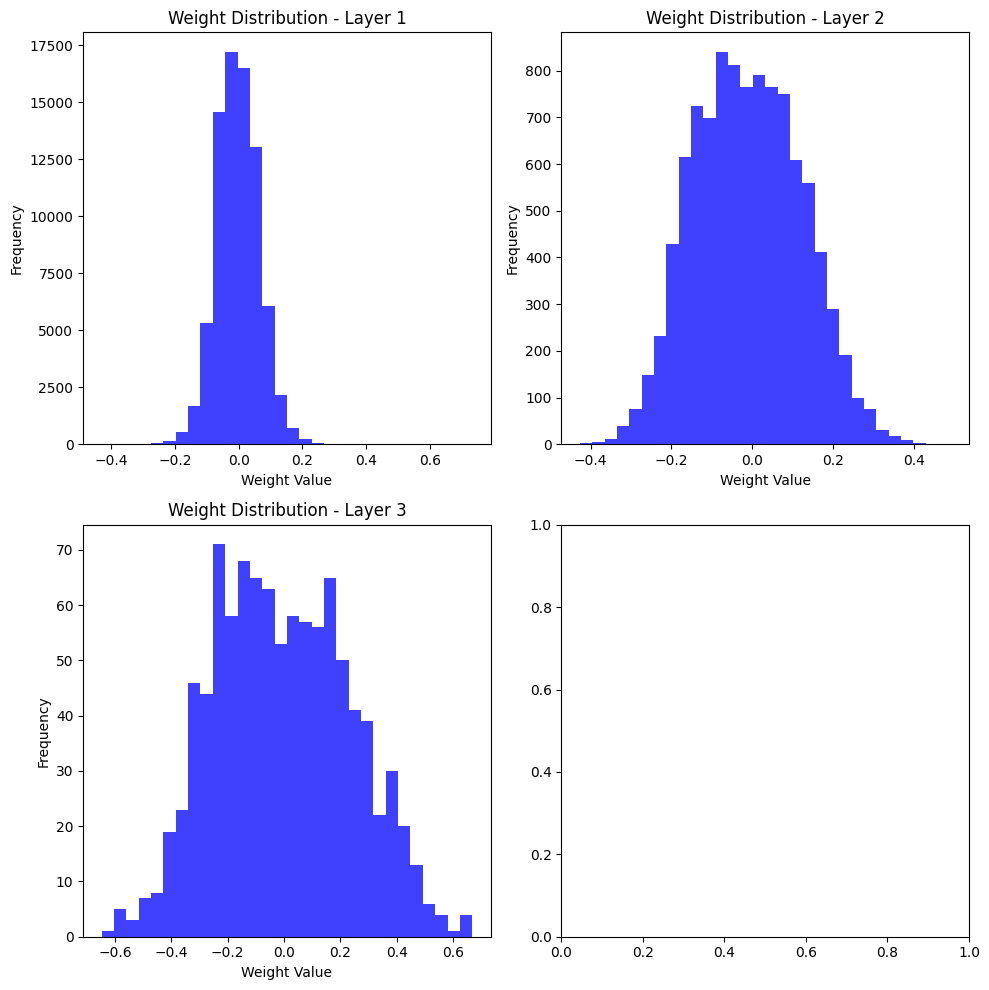

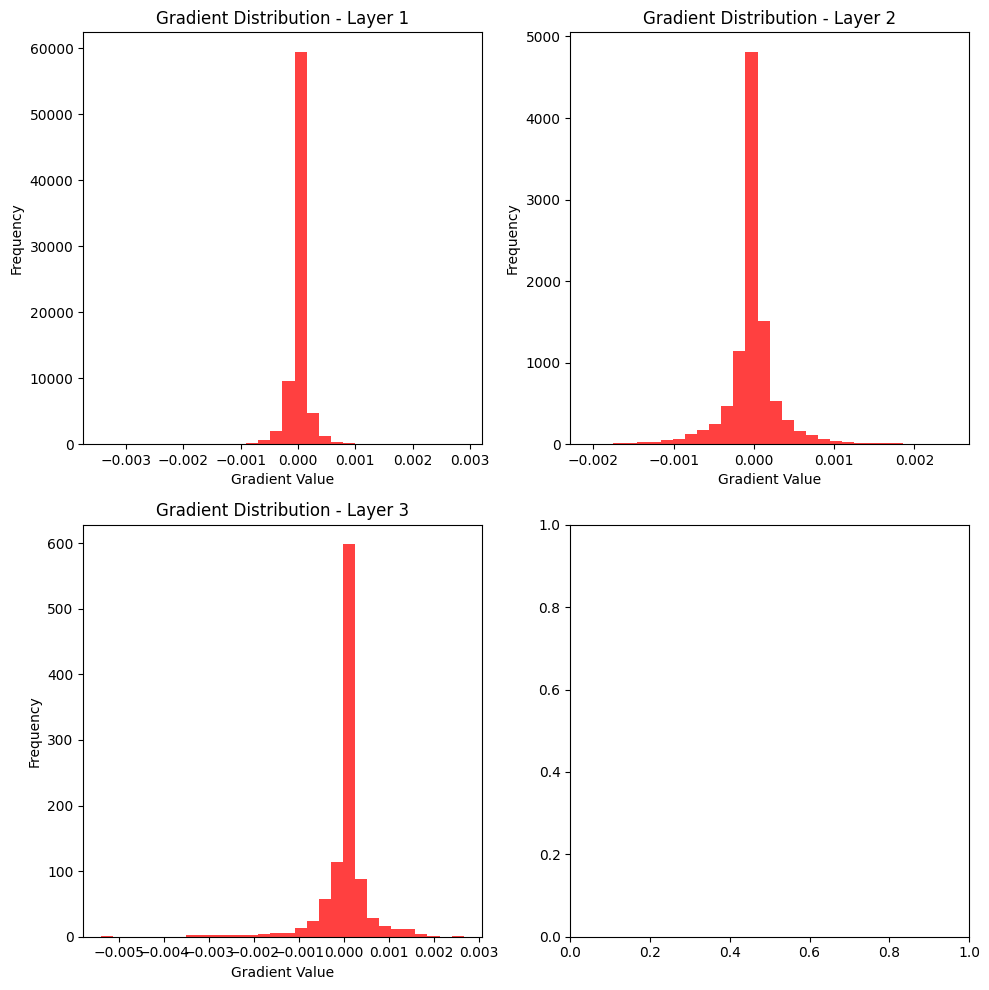

In [32]:
test_initializtion(xavier)

### He initialization

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 119016.11sample/s], Train Loss=0.0165, Val Loss=0.1505


------------------------------------------------------------
Training finished!
Final Train Loss: 0.016457952558994293
Final Val Loss: 0.15047775208950043
Model Accuracy: 0.9724


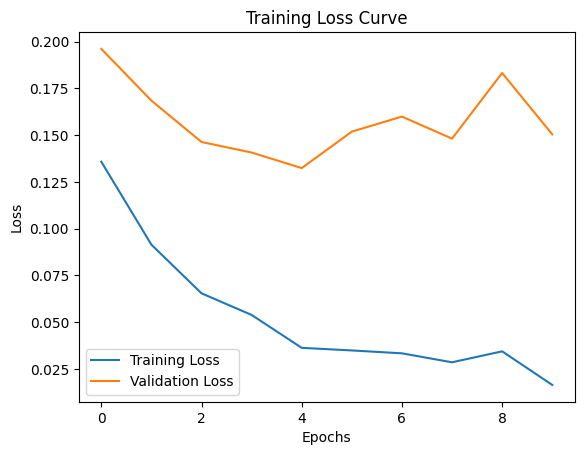

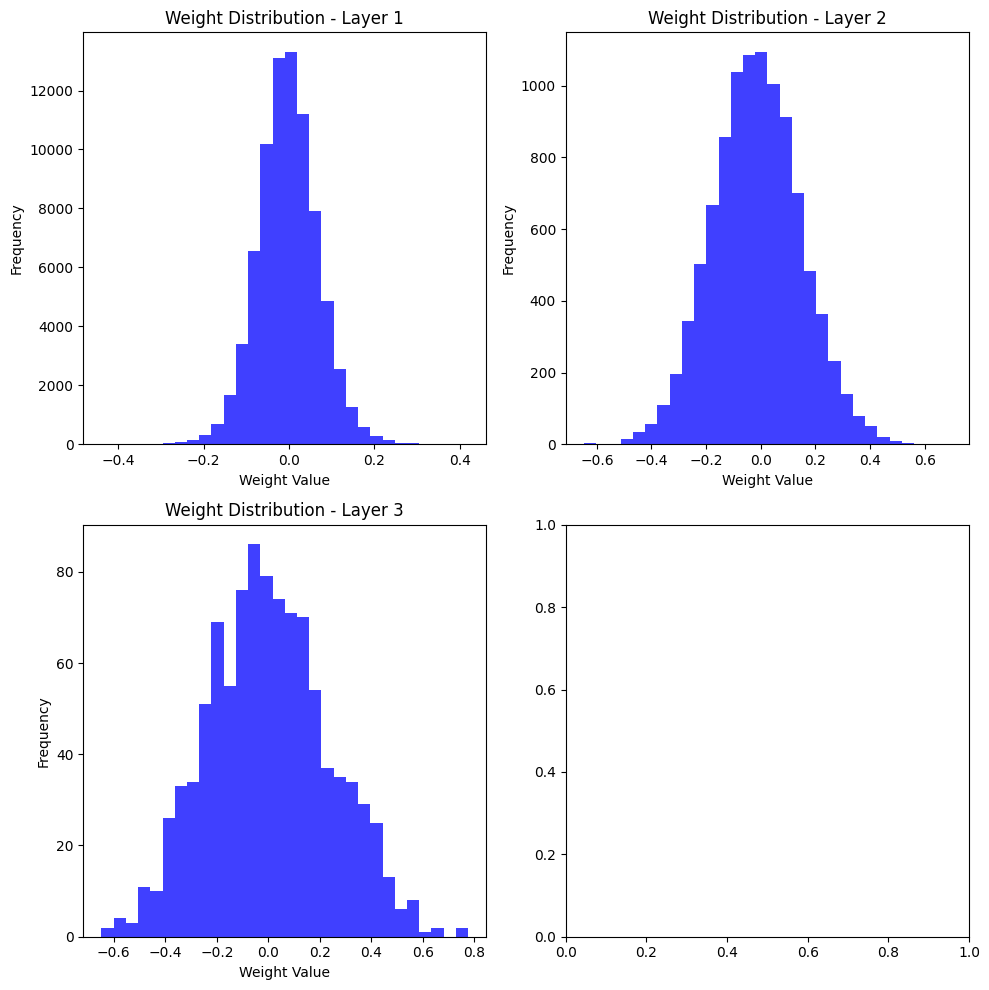

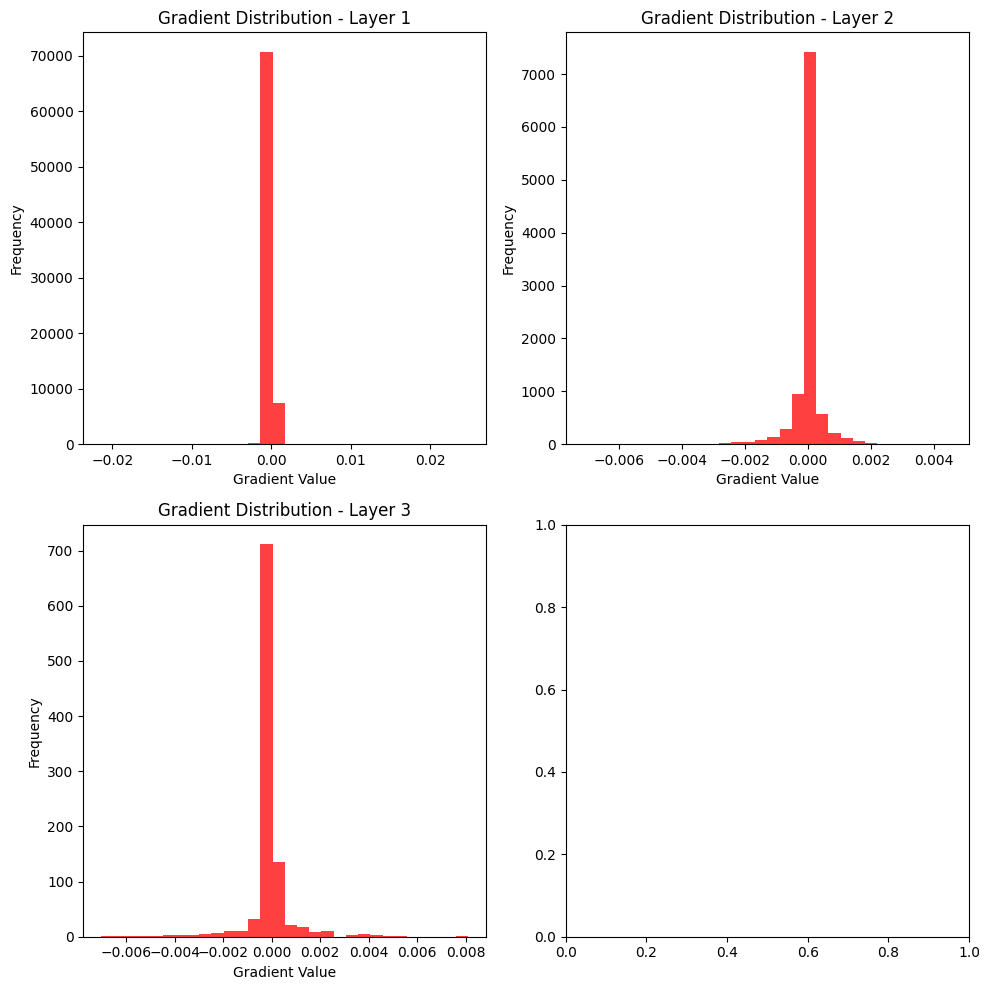

In [33]:
test_initializtion(he)

### Zero initialization

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 101751.68sample/s], Train Loss=2.3012, Val Loss=2.3018


------------------------------------------------------------
Training finished!
Final Train Loss: 2.301184892654419
Final Val Loss: 2.3018300533294678
Model Accuracy: 0.1111


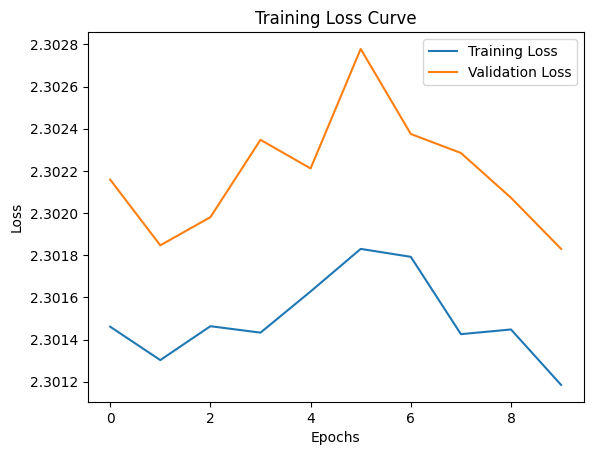

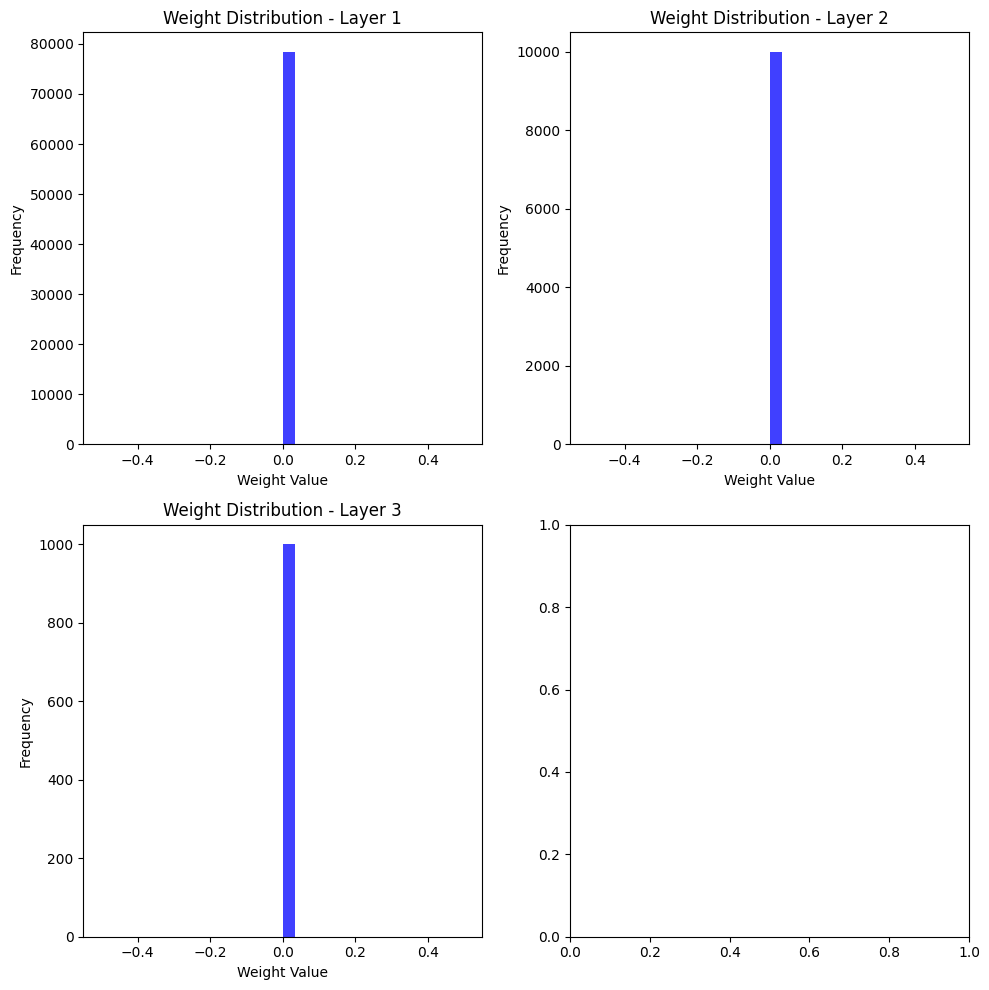

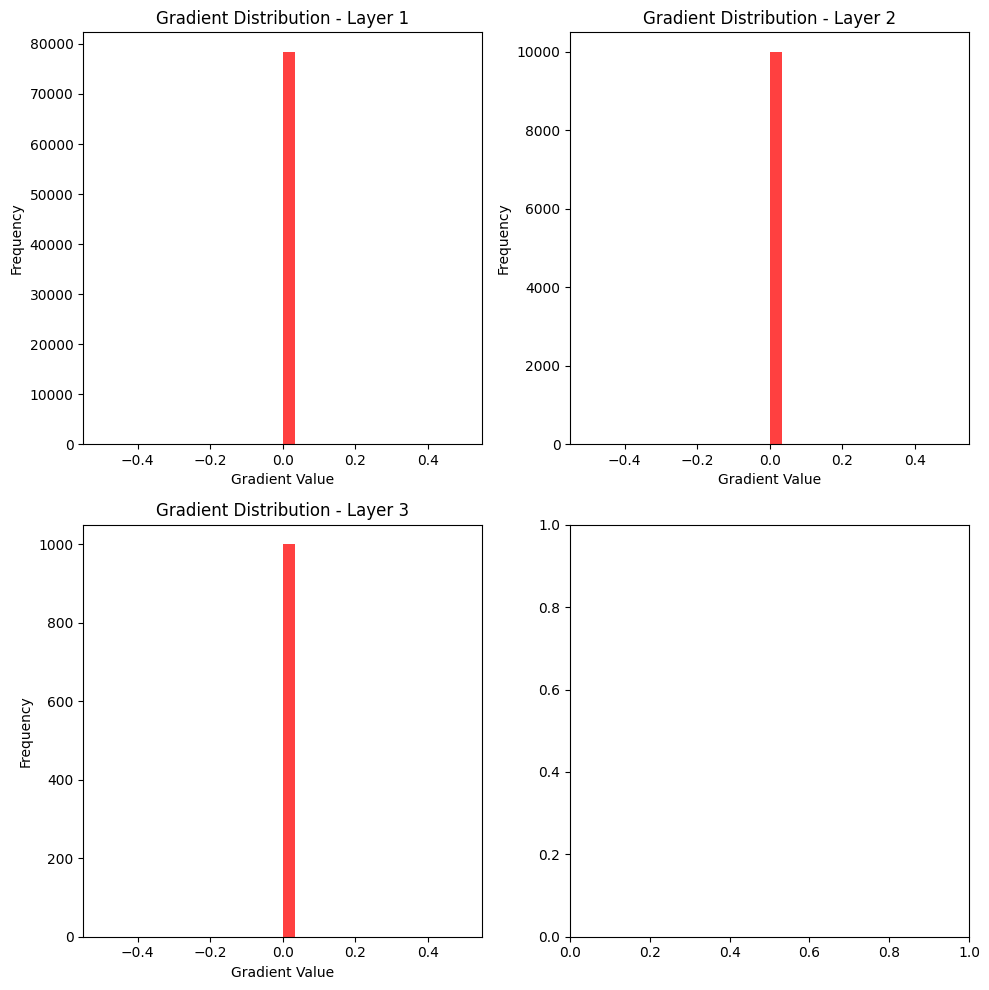

In [34]:
test_initializtion(zero)

### Random Normal initialization

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 127096.13sample/s], Train Loss=18.6398, Val Loss=18.6939


------------------------------------------------------------
Training finished!
Final Train Loss: 18.63983726501465
Final Val Loss: 18.69386863708496
Model Accuracy: 0.0979


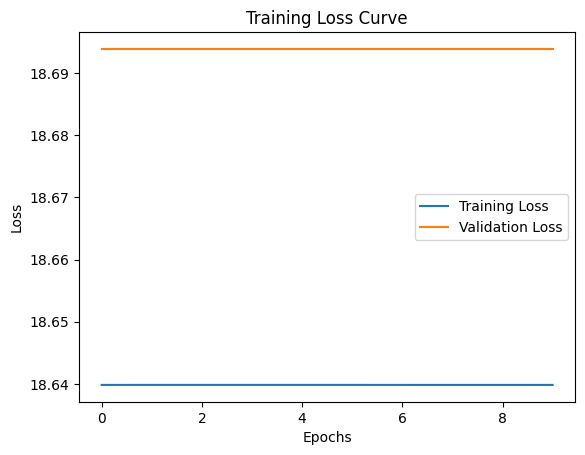

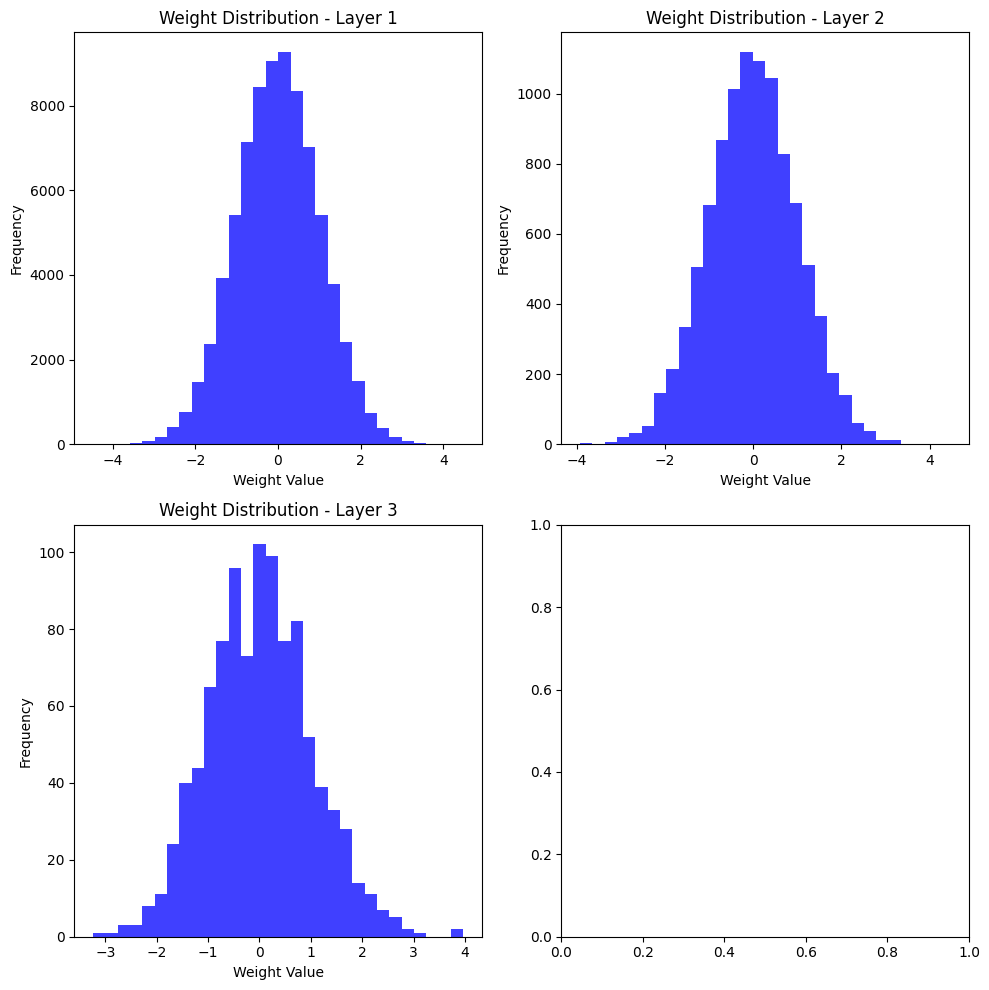

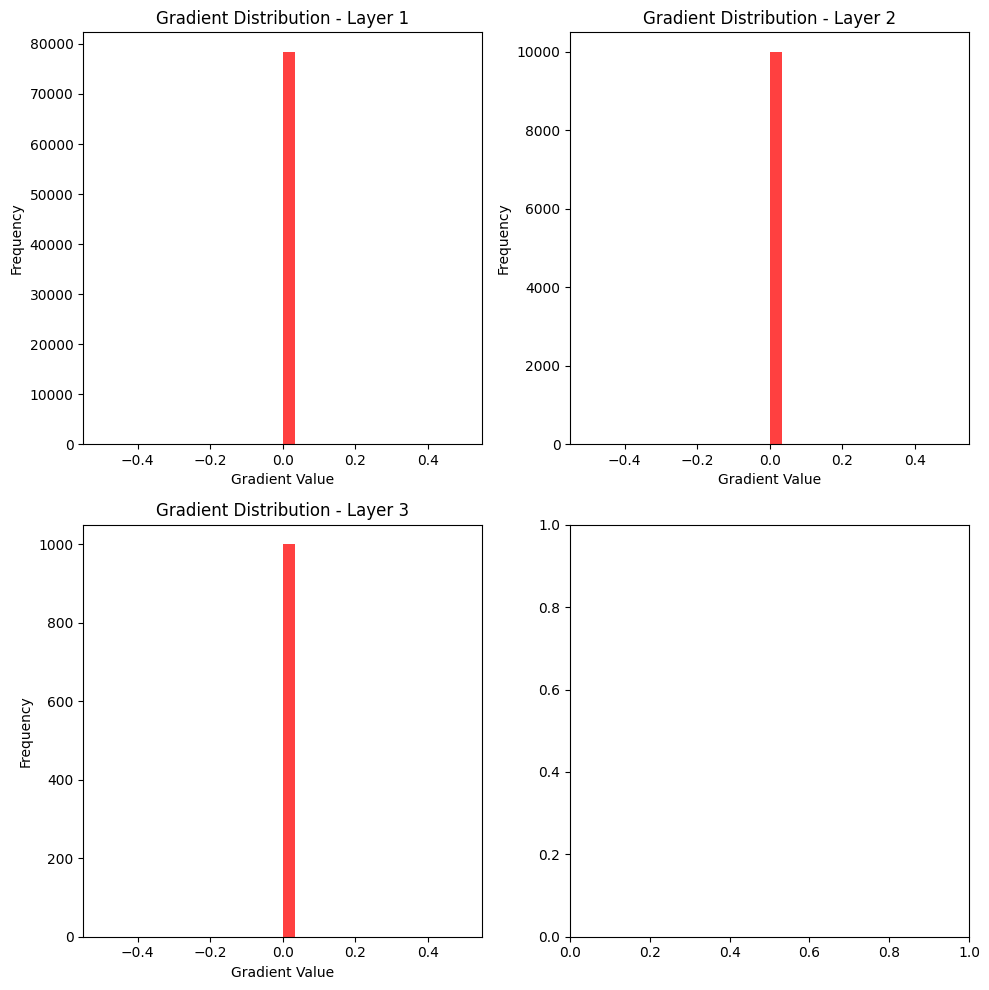

In [35]:
test_initializtion(randNormal)

### Comparison with model from sklearn.
We will compare the performance of our model with the model from sklearn. We will use the same dataset and the same hyperparameters for both models. Things to note:
1. We dont really know if the random_seed is used in the same way for both models, but we will make sure the seed is the same.
2. We set momentum and alpha to 0.0 to make the comparison fair. We will use the default values for the rest of the hyperparameters.
3. From what we read, sklearn will use the default of softmax for the output function if it is a multiclass problem, thus we will do that too.
4. Batch size is set to 200 for both models since its the default value for sklearn  (min(200,n_samples)).
5. SKlearn uses Xavier uniform init by default.

In [38]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=10, solver="sgd", verbose=1, random_state=42, learning_rate_init=0.5, momentum=0.0,
    alpha=0.0)
model.fit(X_train, y_train)
    


Iteration 1, loss = 0.27683797
Iteration 2, loss = 0.12647317
Iteration 3, loss = 0.08235412
Iteration 4, loss = 0.05515292
Iteration 5, loss = 0.04001502
Iteration 6, loss = 0.03118447
Iteration 7, loss = 0.02272944
Iteration 8, loss = 0.01381435
Iteration 9, loss = 0.00667727
Iteration 10, loss = 0.00436788


/home/sean-nugroho/Documents/Semester6/MachineLearning/Tugas/ffnn2/FFNN-from-scratch/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.0, hidden_layer_sizes=(128, 64), learning_rate_init=0.5,
              max_iter=10, momentum=0.0, random_state=42, solver='sgd',
              verbose=1)

In [39]:
print("Train accuracy: ", model.score(X_test, y_test))

Train accuracy:  0.9727142857142858


Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 106693.88sample/s], Train Loss=0.0098, Val Loss=0.1521

------------------------------------------------------------
Training finished!
Final Train Loss: 0.009816144593060017
Final Val Loss: 0.15210646390914917
Model Accuracy: 0.9715


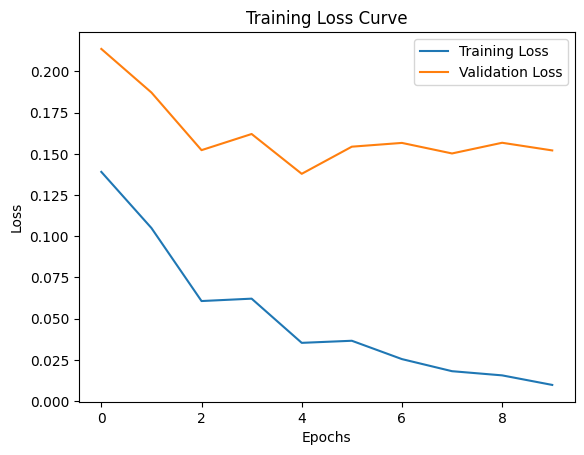

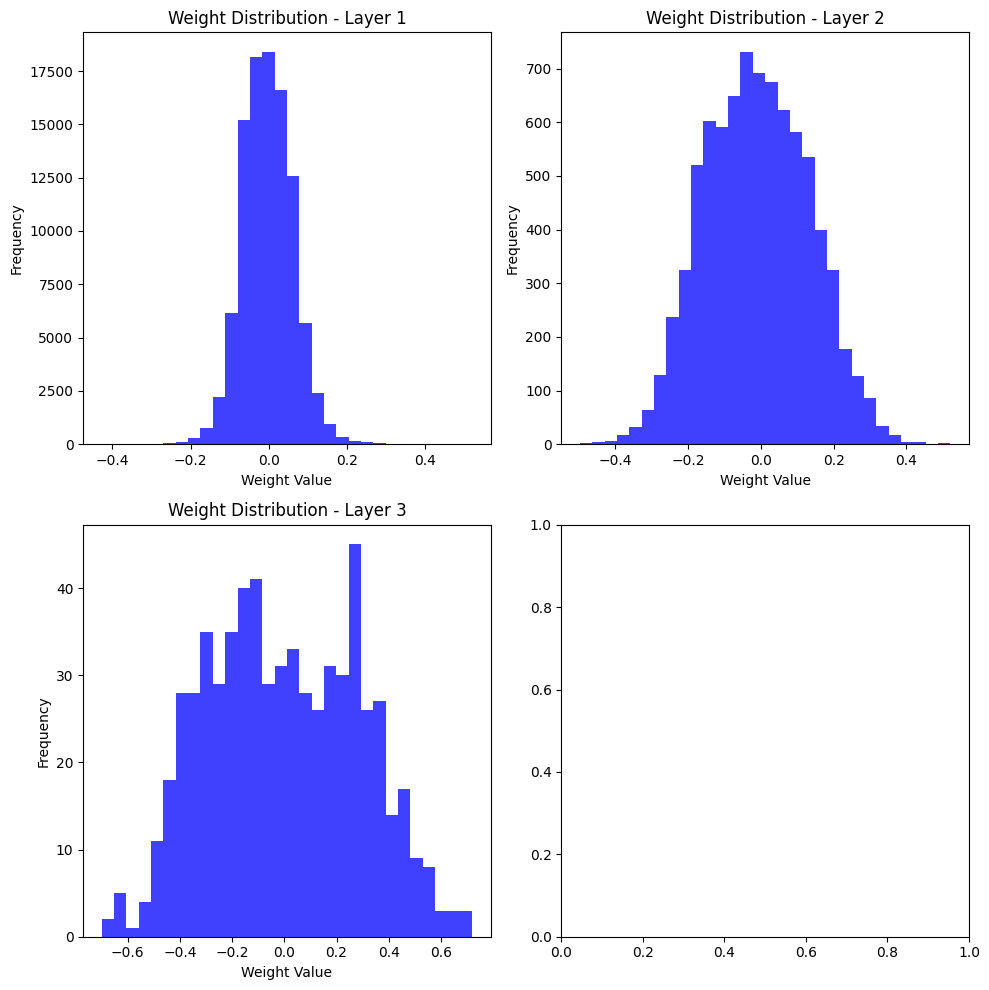

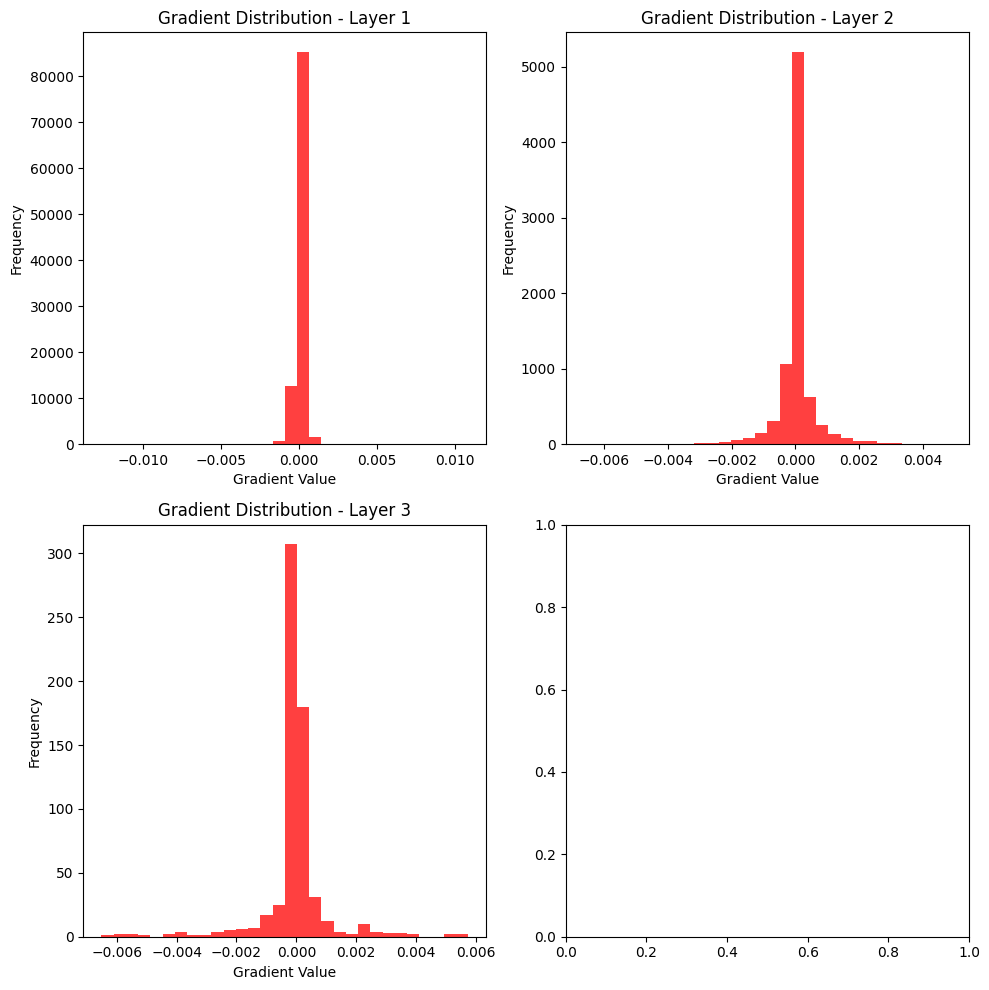

In [40]:
def test_comparison():
    xavier = XavierInit(42, uniform=True)
    X_train_Value = Value(X_train)
    y_train_Value = Value(y_train)
    X_test_Value = Value(X_test)
    y_test_Value = Value(y_test)
    h1 = Layer(128, activation="relu", init_method=xavier, input_shape=784)
    h2 = Layer(64, activation="relu", init_method=xavier)
    out = Layer(10, activation="softmax", init_method=xavier)

    ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
    ourmodel.compile(loss_function="CCE")
    ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)

    ourmodel.evaluate_model(X_test_Value, y_test_Value)
    ourmodel.plot_loss()
    ourmodel.plot_weight_distribution([0,1,2])
    ourmodel.plot_weight_gradient_distribution([0,1,2])

test_comparison()

In [41]:
def test_regularization(reg:str):
    xavier = XavierInit(42, uniform=True)
    X_train_Value = Value(X_train)
    y_train_Value = Value(y_train)
    X_test_Value = Value(X_test)
    y_test_Value = Value(y_test)
    h1 = Layer(128, activation="relu", init_method=xavier, input_shape=784)
    h2 = Layer(64, activation="relu", init_method=xavier)
    out = Layer(10, activation="softmax", init_method=xavier)

    ourmodel = FFNN(learning_rate=0.5, epochs=10, layers_list=[h1, h2, out], random_seed=42, verbose=1, batch_size=200)
    ourmodel.compile(loss_function="CCE",regularization=reg)
    ourmodel.fit(X_train_Value, y_train_Value, X_test_Value, y_test_Value)

    ourmodel.evaluate_model(X_test_Value, y_test_Value)
    ourmodel.plot_loss()
    ourmodel.plot_weight_distribution([0,1,2])
    ourmodel.plot_weight_gradient_distribution([0,1,2])

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 116582.29sample/s], Train Loss=0.0098, Val Loss=0.1521


------------------------------------------------------------
Training finished!
Final Train Loss: 0.009816144593060017
Final Val Loss: 0.15210646390914917
Model Accuracy: 0.9715


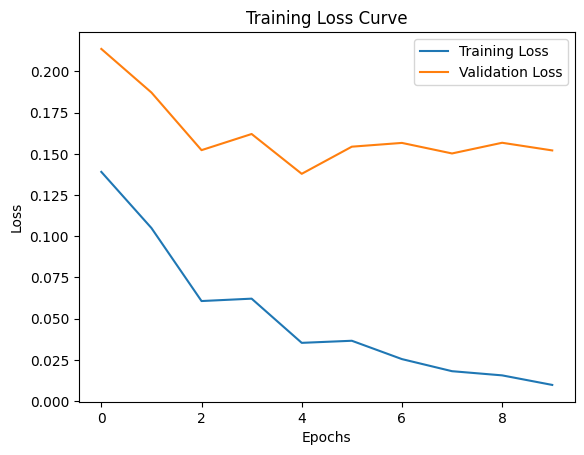

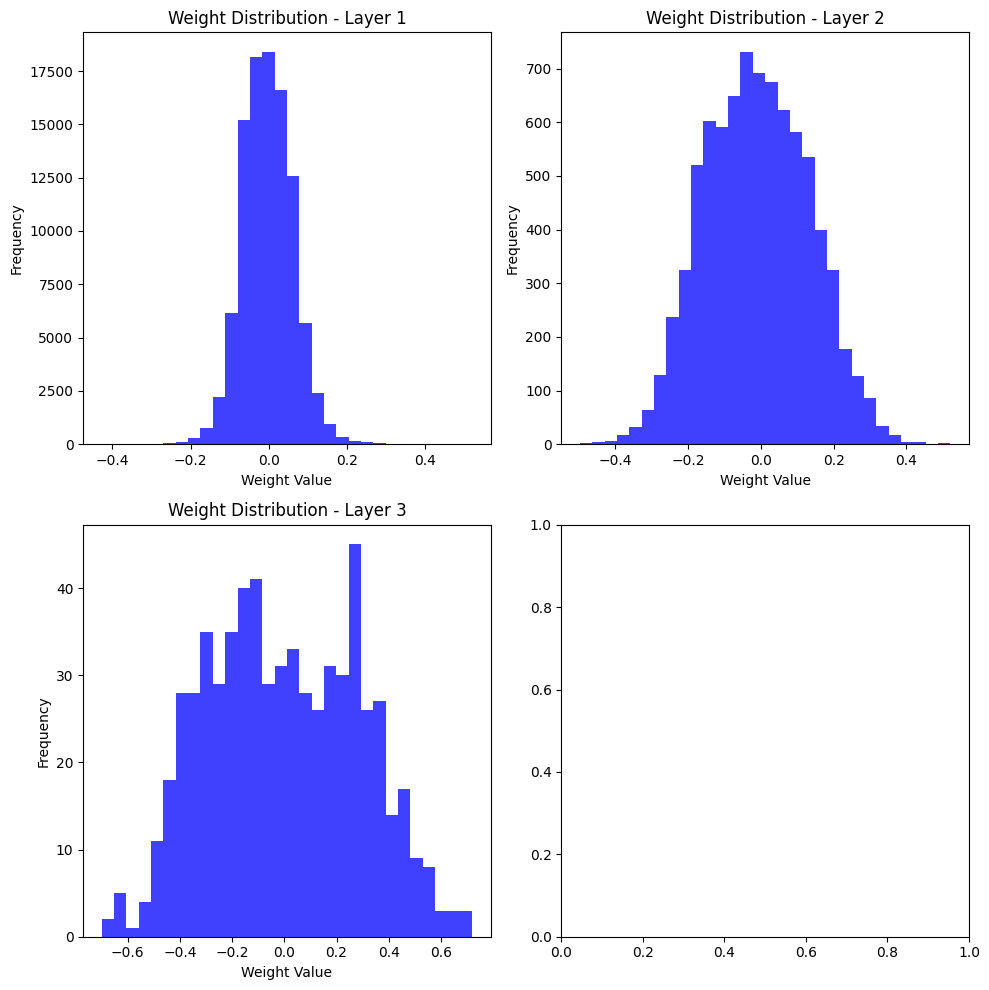

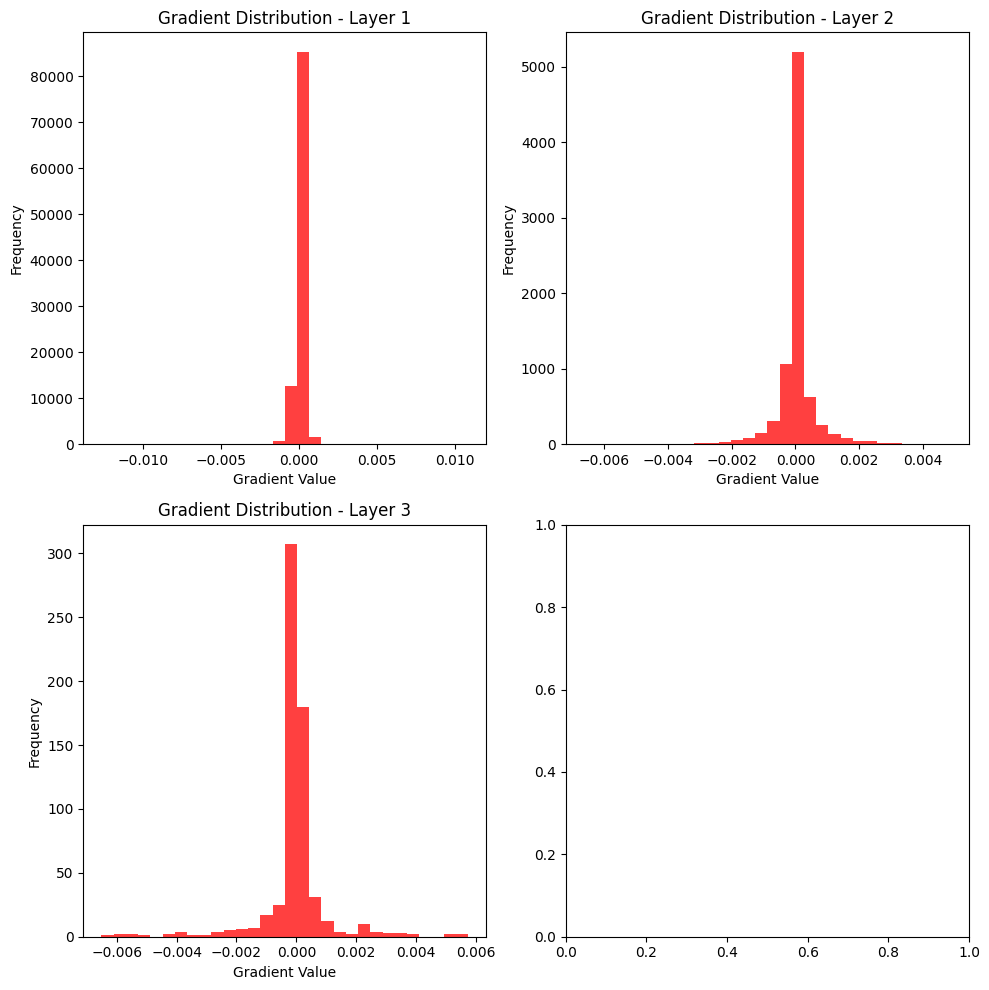

In [42]:
test_regularization(None)

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 69869.38sample/s], Train Loss=0.0508, Val Loss=0.1221


------------------------------------------------------------
Training finished!
Final Train Loss: 0.050817519426345825
Final Val Loss: 0.12208618968725204
Model Accuracy: 0.9693


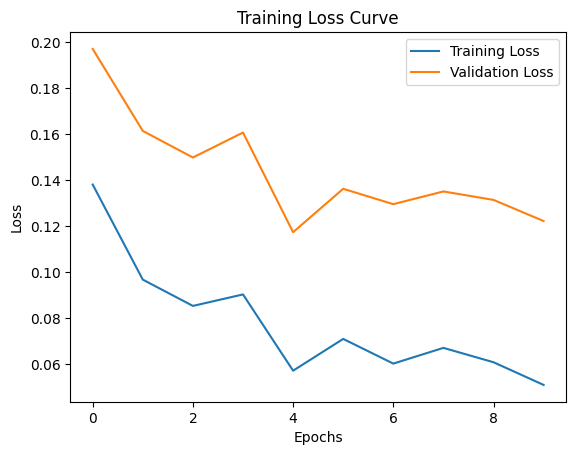

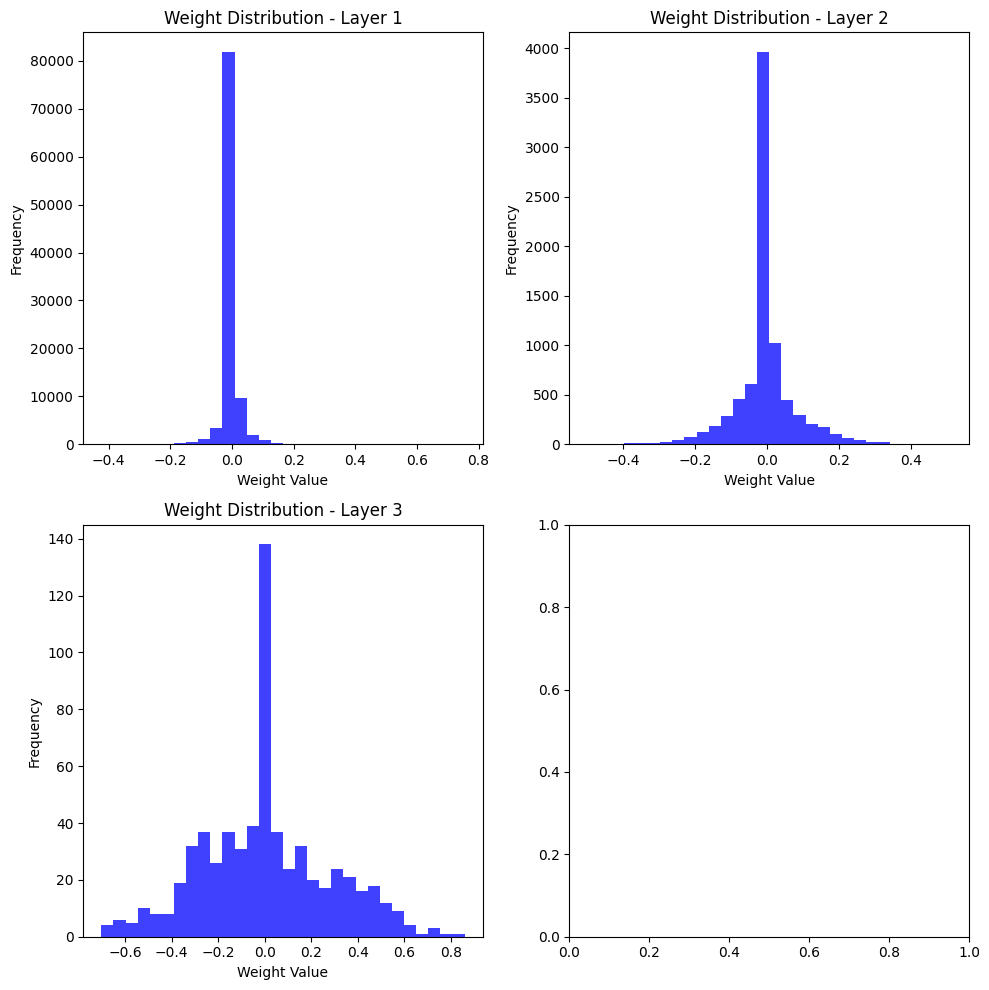

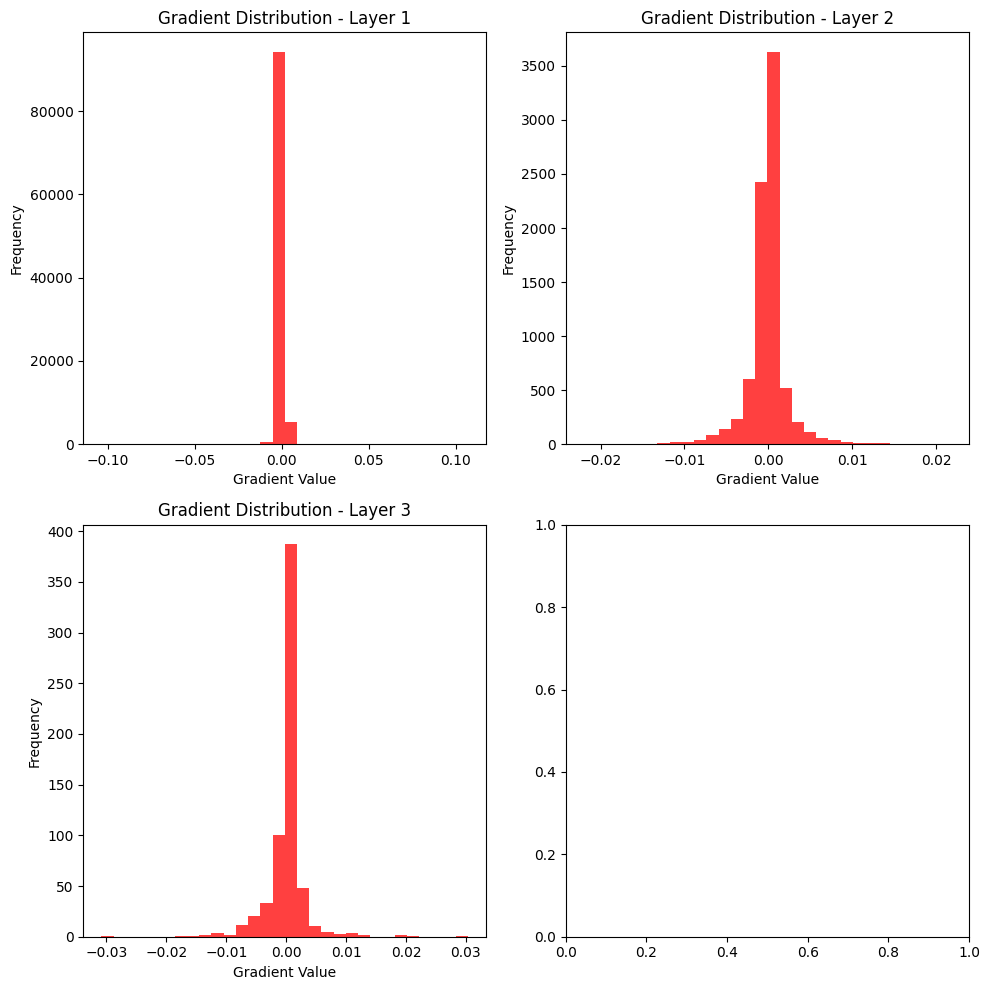

In [43]:
test_regularization("L1")

Epoch 10/10:	100%|████████████████████████████████████████████████████████████████████████████████| 56000/56000 [00:00, 89828.77sample/s], Train Loss=0.0161, Val Loss=0.1327 


------------------------------------------------------------
Training finished!
Final Train Loss: 0.01614483632147312
Final Val Loss: 0.1326848268508911
Model Accuracy: 0.9715


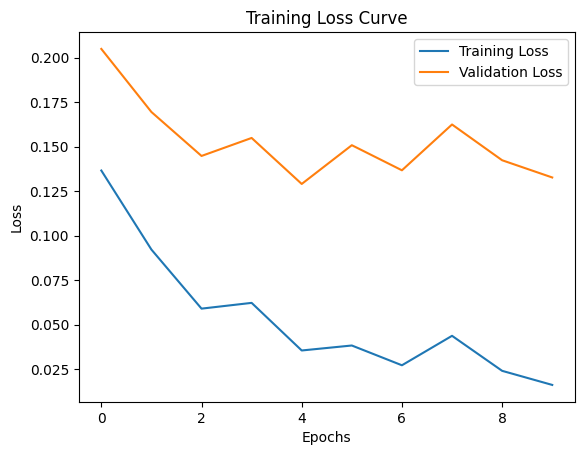

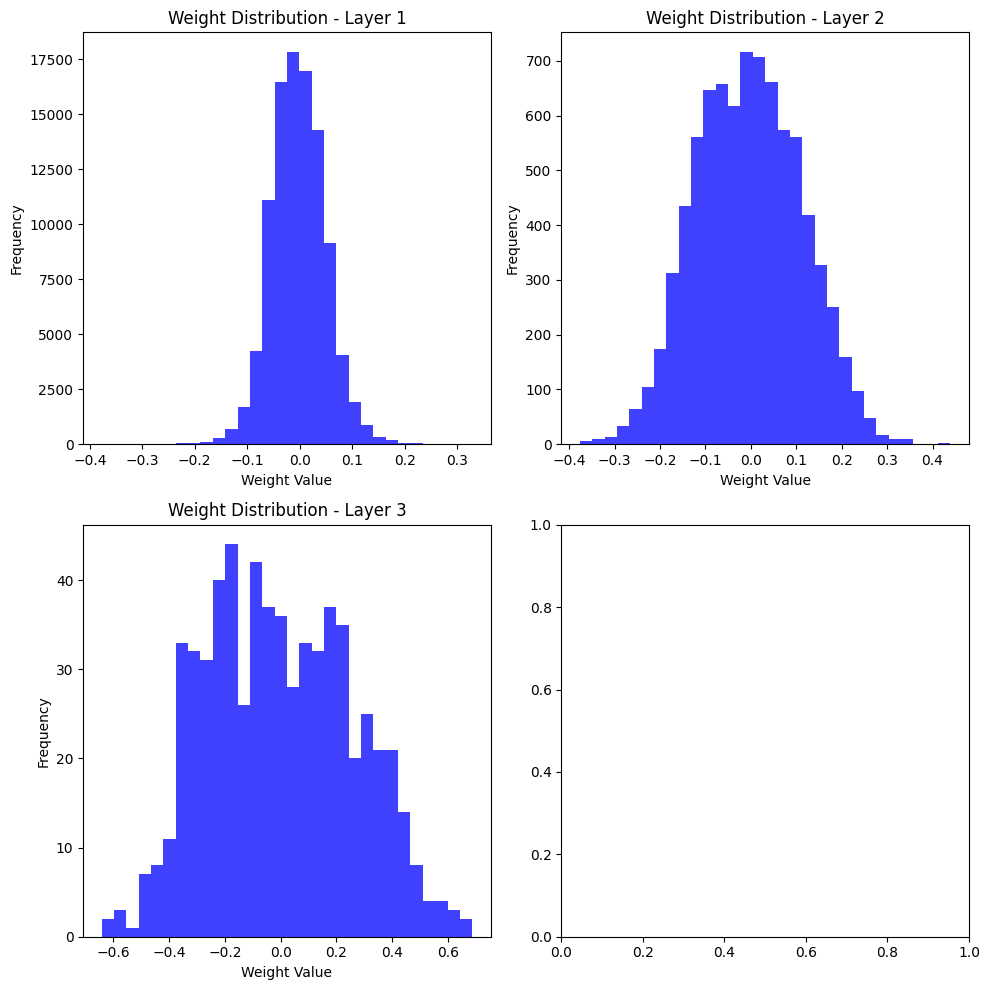

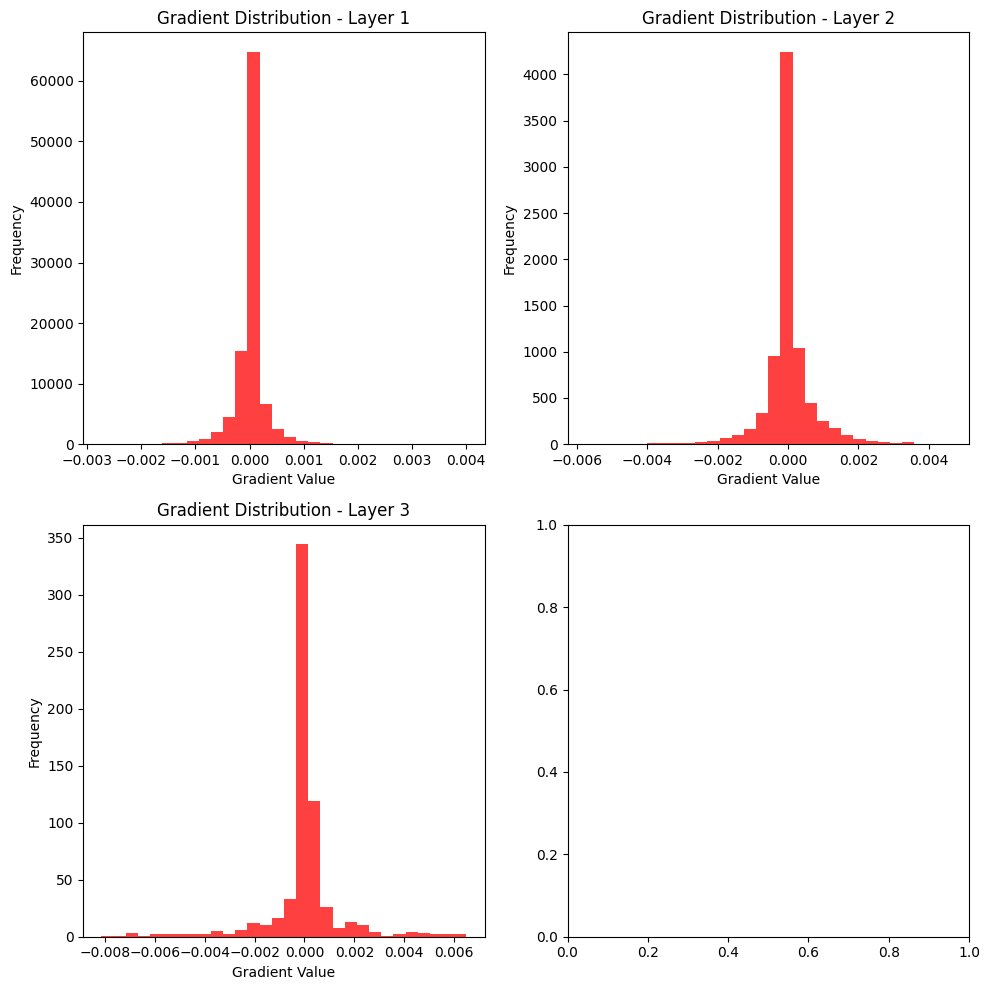

In [44]:
test_regularization("L2")